In [1]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
import collections
from urllib.parse import urljoin
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import itertools
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/drazenzack/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Functions Used

In [12]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr, '', raw_html)
    return(cleantext)

tokenizer = RegexpTokenizer(r'\w+')
def token(x):
    ww = tokenizer.tokenize(x)
    return(ww)

stop = stopwords.words('english')
stop.extend(['day','ago'])
def remove_stopwords(x):
    words = [w for w in x if w not in stop]
    return(words)

#lemm = WordNetLemmatizer()

def word_lem(x):
    lem_text = " ".join(i for i in x)
    return(lem_text)

def plot_count(x,title):
    sns.set()
    plt.figure(figsize = (20,9))
    sns.barplot(x='ReviewText', y='count', data=x).set_title(title,fontsize=20)
    plt.xlabel('Words',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plt.xticks(rotation=45, fontsize = 15)
    plt.yticks(fontsize = 15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, int(height) + 3.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')
    plt.show()

In [13]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return(words_freq[:n])

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return(words_freq[:n])

def single_word(x, y,num):
    common_words = get_top_n_words(x['text'], num)
    df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    n_words = pd.DataFrame(df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False))
    n_words.reset_index(inplace = True)
    print(n_words)
    plot_count(n_words, y)
    
def bi_word(x, y,num):
    common_words = get_top_n_bigram(x['text'], num)
    df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    n_words = pd.DataFrame(df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False))
    n_words.reset_index(inplace = True)
    print(n_words)
    plot_count(n_words, y)

In [14]:

def getlink(url,x):
    text_list = []
    for i in range(x): 
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs={'rel':['nofollow']})
        for c in all_matches:
            jd_url = 'http://www.indeed.com/m/'+c['href']
            response = urlopen(jd_url)
            #jd_page = response.text
            jd_soup = BeautifulSoup(response, 'lxml')
            jd_desc = jd_soup.findAll('div',attrs={'id':['desc']})
            text = ' '.join(map(str, jd_desc)) 
            text = cleanhtml(text)
            text = text.replace('\n','')
            text_list.append(text)
    
        url_all = soup.findAll(attrs={'rel':['next']})

        url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
    df = pd.DataFrame(text_list, columns = ['text'])
    df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    df['text'] = df['text'].replace('\d+', '', regex=True)
    df['text'] = df['text'].apply(token)
    df['text'] = df['text'].apply(remove_stopwords)
    df['text'] = df['text'].apply(word_lem)
    return(df)

### Nationwide

In [15]:
df2 = getlink("https://www.indeed.com/m/jobs?q=marketing+manager",50)

In [16]:
get_top_n_words(df2['text'], 50)

[('marketing', 3997),
 ('experience', 1354),
 ('brand', 1211),
 ('team', 1210),
 ('work', 1204),
 ('business', 1020),
 ('media', 930),
 ('management', 863),
 ('sales', 861),
 ('including', 778),
 ('social', 757),
 ('new', 714),
 ('digital', 702),
 ('skills', 690),
 ('ability', 686),
 ('product', 685),
 ('manager', 659),
 ('develop', 643),
 ('development', 640),
 ('content', 630),
 ('years', 613),
 ('customer', 582),
 ('strategy', 564),
 ('creative', 557),
 ('company', 555),
 ('across', 536),
 ('job', 513),
 ('communication', 509),
 ('teams', 507),
 ('market', 500),
 ('drive', 496),
 ('support', 494),
 ('programs', 492),
 ('manage', 489),
 ('communications', 489),
 ('working', 481),
 ('key', 472),
 ('strong', 461),
 ('position', 460),
 ('required', 454),
 ('campaigns', 446),
 ('role', 441),
 ('strategic', 432),
 ('global', 425),
 ('people', 418),
 ('time', 411),
 ('strategies', 406),
 ('us', 403),
 ('ensure', 396),
 ('events', 387)]

In [17]:
get_top_n_bigram(df2['text'], 50)

[('social media', 497),
 ('marketing manager', 287),
 ('cross functional', 234),
 ('years experience', 182),
 ('digital marketing', 180),
 ('equal opportunity', 169),
 ('project management', 167),
 ('fast paced', 158),
 ('marketing communications', 151),
 ('national origin', 141),
 ('sexual orientation', 139),
 ('marketing team', 138),
 ('gender identity', 126),
 ('veteran status', 126),
 ('communication skills', 126),
 ('opportunity employer', 120),
 ('marketing programs', 116),
 ('brand marketing', 114),
 ('race color', 112),
 ('marketing strategies', 112),
 ('bachelor degree', 110),
 ('marketing plans', 107),
 ('type full', 106),
 ('internal external', 105),
 ('marketing campaigns', 104),
 ('marketing strategy', 103),
 ('without regard', 102),
 ('orientation gender', 96),
 ('skills ability', 91),
 ('best practices', 90),
 ('regard race', 90),
 ('qualified applicants', 87),
 ('marketing experience', 85),
 ('functional teams', 85),
 ('long term', 85),
 ('product marketing', 84),
 ('re

### 6 Cities

https://www.indeed.com/m/jobs?q=marketing+manager&l=Washington%2C+DC
        ReviewText  count
0        marketing   1586
1             work    678
2       experience    660
3             team    620
4            media    513
5        including    469
6         business    441
7   communications    435
8       management    435
9            brand    401
10         digital    390
11     development    380
12          skills    373
13         ability    372
14         content    359
15           sales    338
16        position    332
17             new    324
18          social    323
19         manager    322


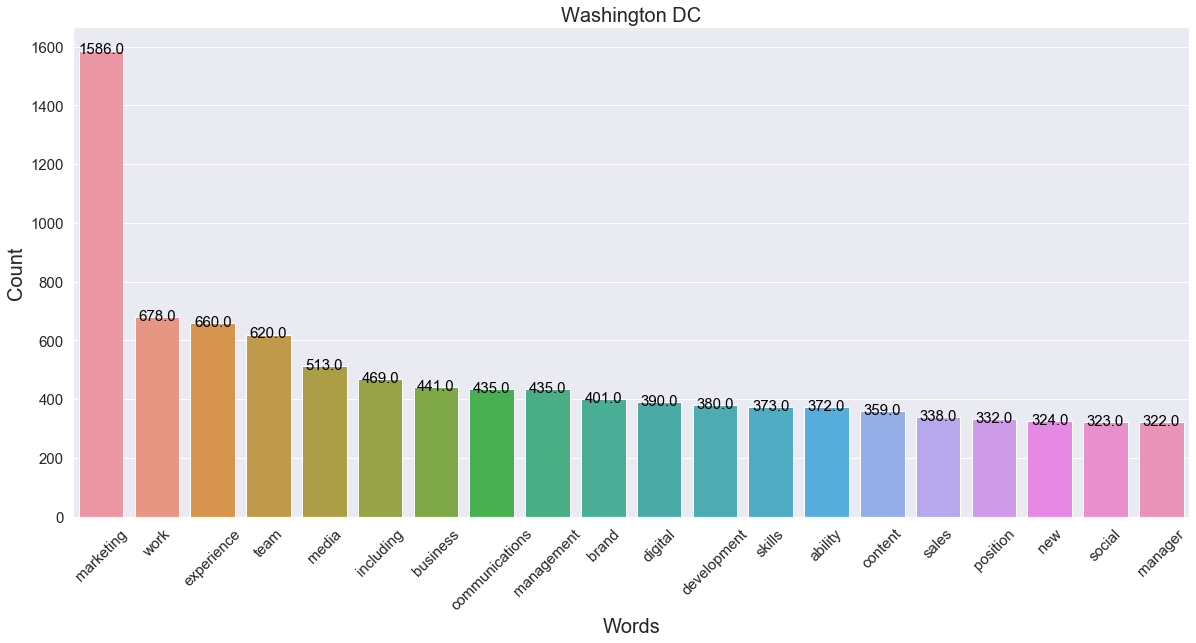

                  ReviewText  count
0               social media    191
1          marketing manager    106
2   marketing communications    103
3           years experience     90
4          equal opportunity     89
5        marketing campaigns     73
6       opportunity employer     71
7         project management     69
8          digital marketing     68
9            bachelor degree     68
10            best practices     66
11              ability work     66
12           national origin     64
13        marketing strategy     64
14              team members     61
15             washington dc     60
16         internal external     60
17                fast paced     59
18            marketing team     57
19            veteran status     55


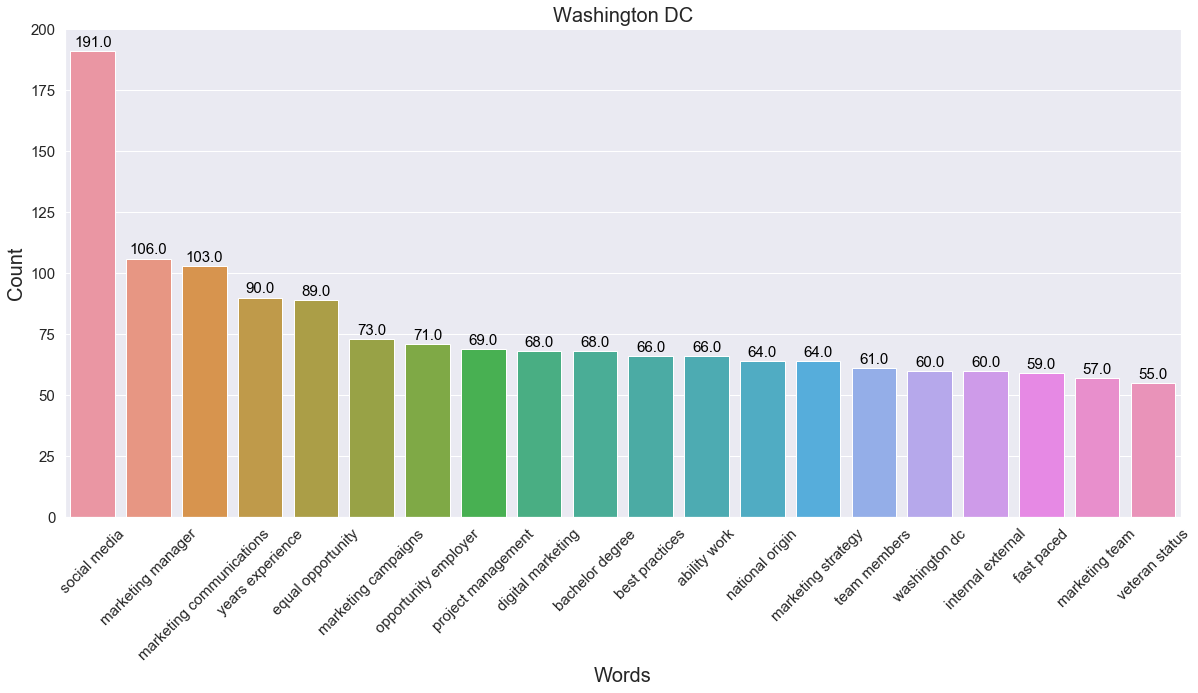

https://www.indeed.com/m/jobs?q=marketing+manager&l=New+York
    ReviewText  count
0    marketing   1763
1        brand    626
2         team    577
3   experience    546
4         work    493
5        media    482
6     business    426
7          new    411
8       social    395
9      digital    384
10   including    379
11       sales    351
12    creative    348
13      across    337
14  management    305
15      global    300
16     ability    296
17    strategy    294
18     company    283
19      skills    282


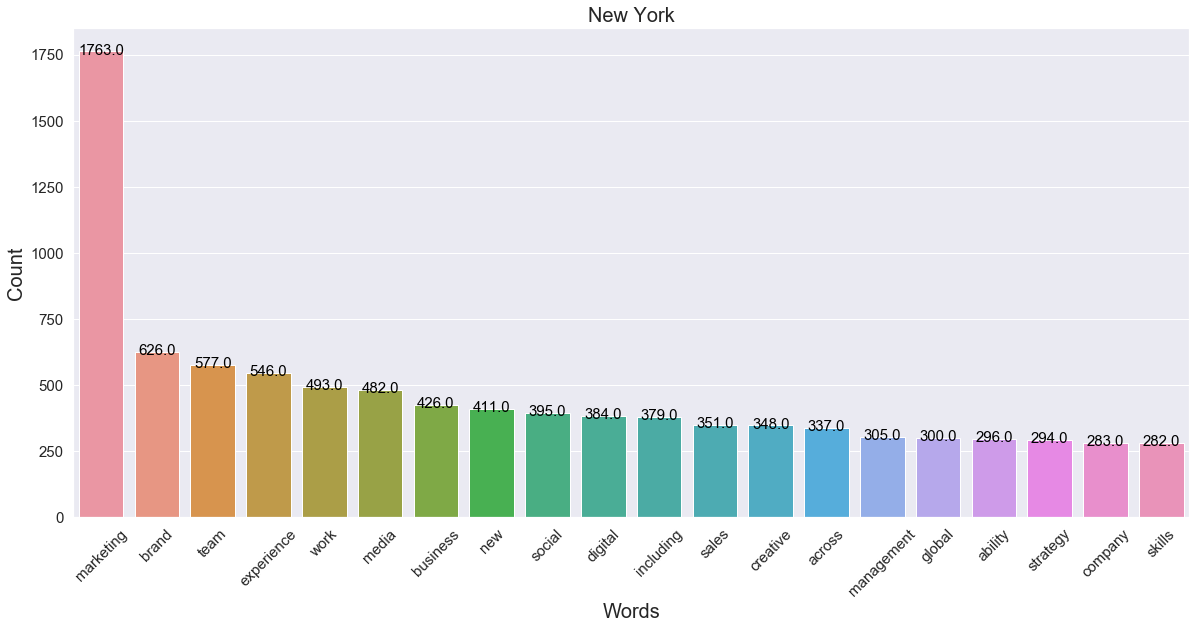

              ReviewText  count
0           social media    203
1       cross functional    130
2               new york     97
3      marketing manager     93
4             fast paced     87
5         marketing team     83
6       years experience     81
7        brand marketing     75
8    marketing campaigns     72
9      equal opportunity     69
10     digital marketing     61
11    project management     60
12       national origin     57
13    sexual orientation     57
14          around world     57
15    marketing strategy     56
16  communication skills     56
17      functional teams     55
18    marketing programs     54
19       marketing plans     52


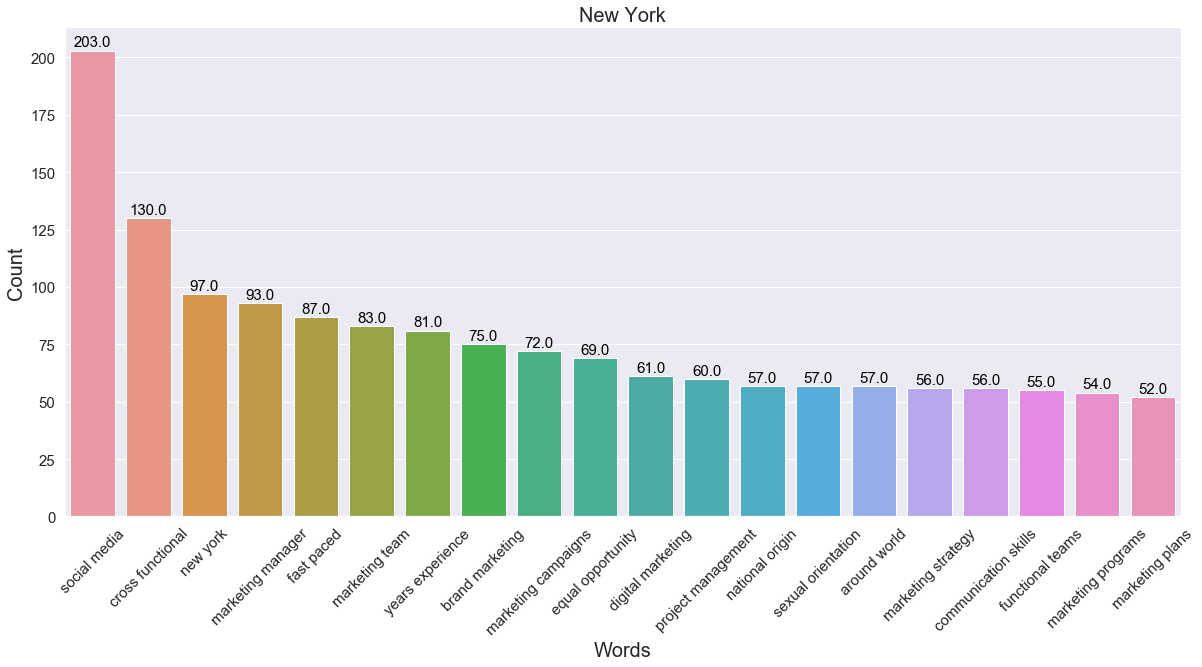

https://www.indeed.com/m/jobs?q=marketing+manager&l=San+Francisco
    ReviewText  count
0    marketing   1576
1   experience    673
2         team    605
3         work    569
4      content    530
5      product    474
6     business    418
7    including    390
8        brand    387
9       across    332
10         new    329
11  management    326
12       teams    315
13      skills    310
14    strategy    309
15    customer    298
16     ability    292
17        data    290
18      social    290
19       drive    287


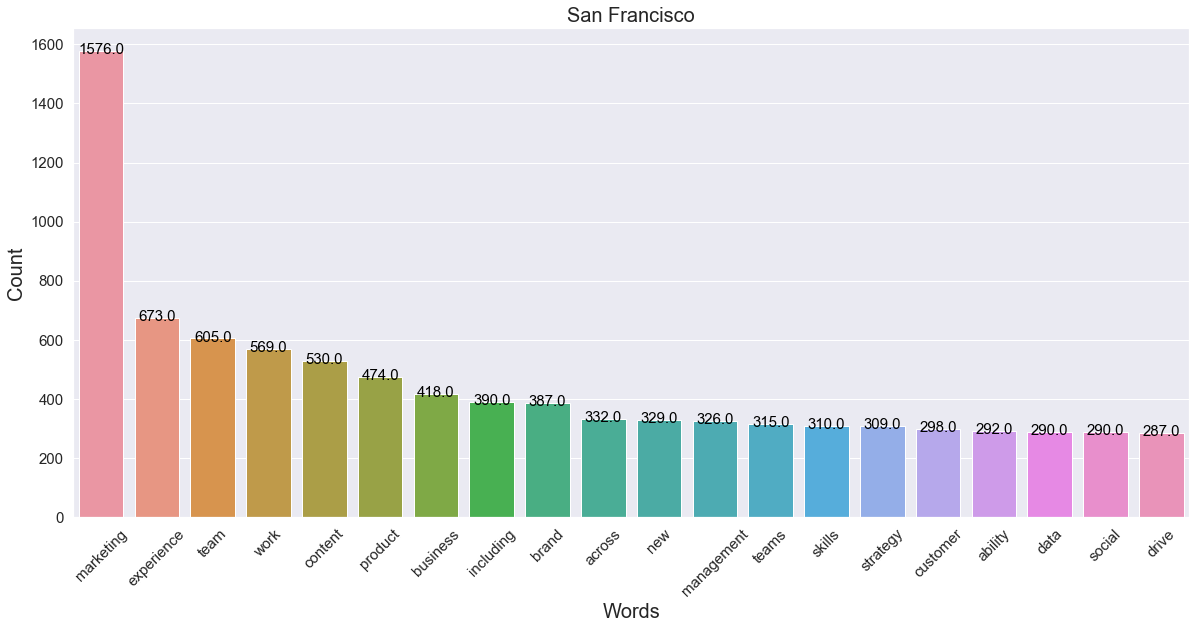

                  ReviewText  count
0              san francisco    193
1               social media    151
2           cross functional    131
3          marketing manager    128
4           years experience    105
5          product marketing    103
6          equal opportunity     80
7         sexual orientation     79
8            national origin     76
9                 fast paced     74
10            marketing team     72
11      qualified applicants     72
12  marketing communications     70
13      opportunity employer     67
14            veteran status     63
15      communication skills     61
16           gender identity     60
17        project management     58
18               fair chance     58
19              team members     56


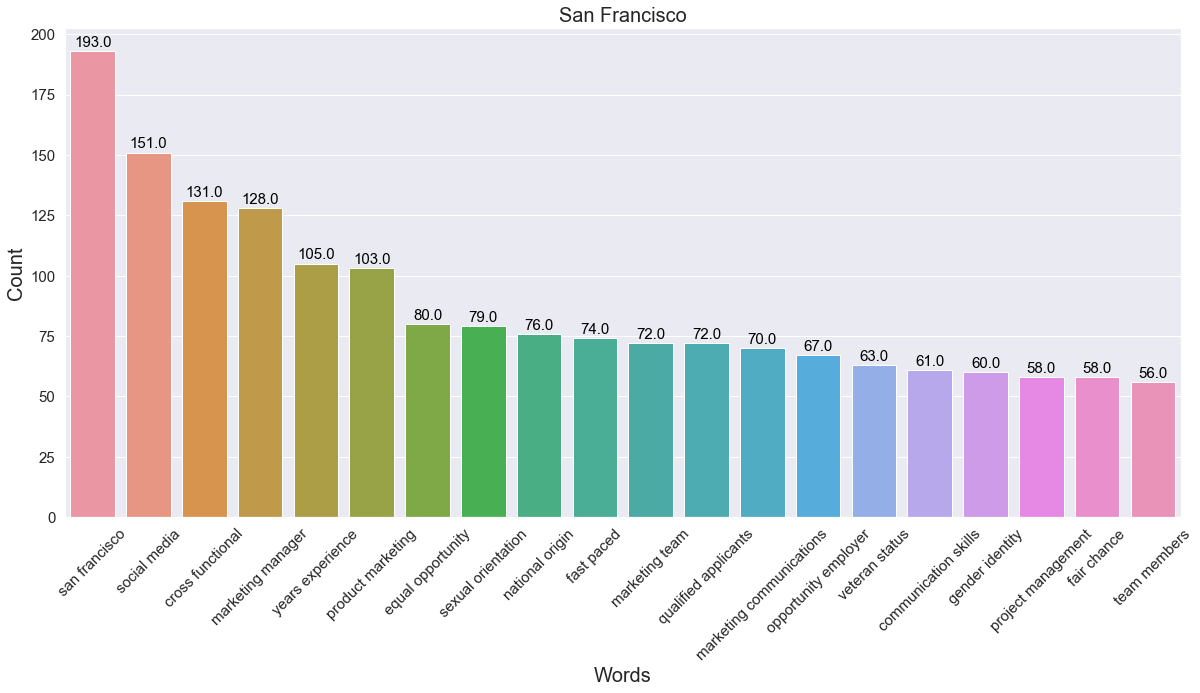

https://www.indeed.com/m/jobs?q=marketing+manager&l=Chicago
        ReviewText  count
0        marketing   1660
1       experience    667
2            brand    635
3             work    562
4             team    536
5         business    515
6            media    424
7           social    407
8       management    398
9          product    388
10     development    345
11           sales    325
12         manager    324
13       including    321
14           years    309
15        strategy    296
16             new    280
17          skills    279
18         ability    269
19  communications    268


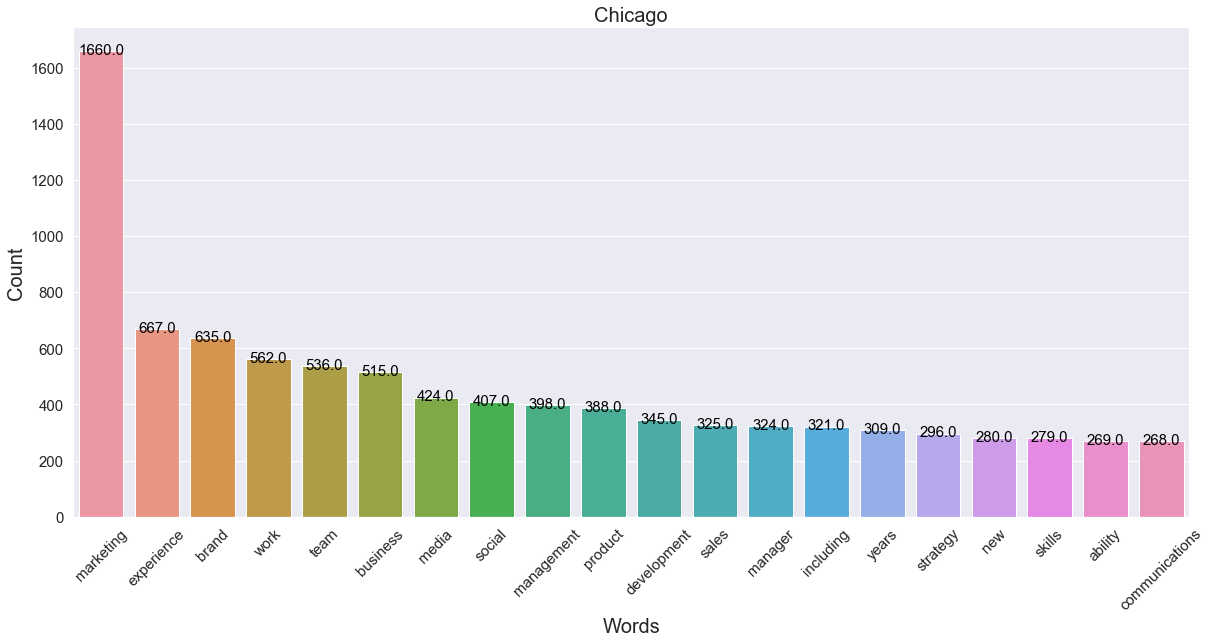

                  ReviewText  count
0               social media    277
1           cross functional    124
2           years experience    123
3          marketing manager    112
4         project management     86
5   marketing communications     69
6                 fast paced     68
7                least years     67
8             marketing team     65
9            marketing plans     63
10         digital marketing     63
11              team members     62
12           bachelor degree     62
13           national origin     61
14        sexual orientation     61
15         internal external     59
16      communication skills     56
17      marketing experience     55
18         equal opportunity     52
19           gender identity     51


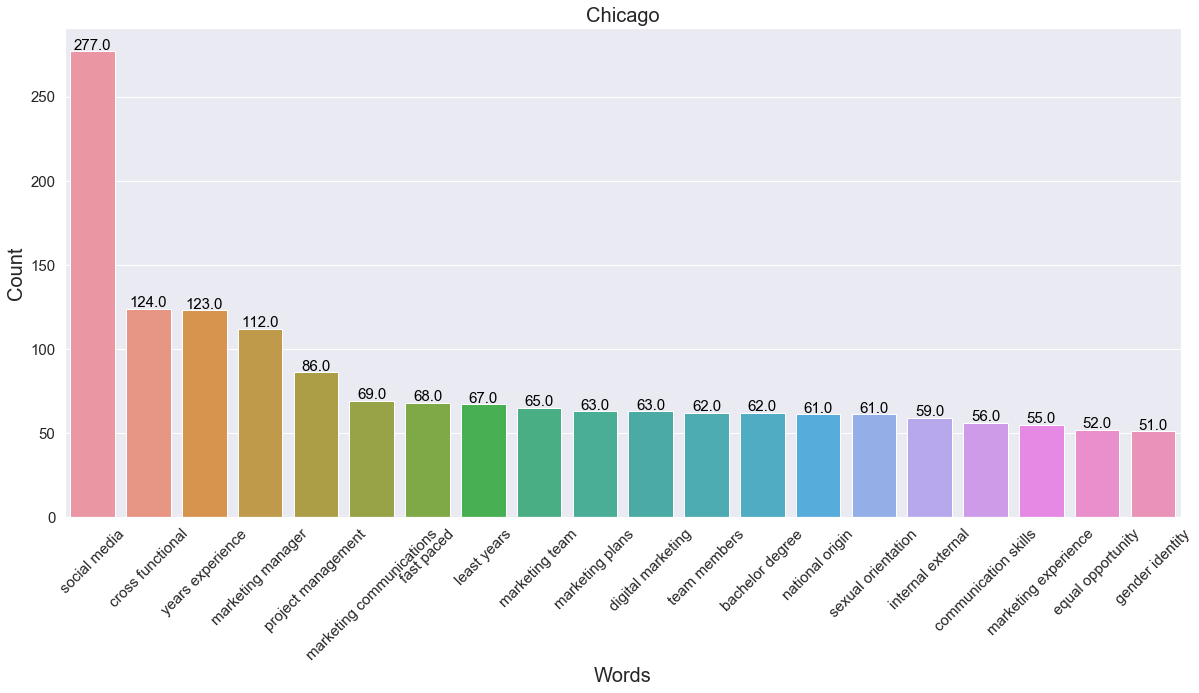

https://www.indeed.com/m/jobs?q=marketing+manager&l=Philadelphia
        ReviewText  count
0        marketing   1791
1       experience    730
2         business    631
3             team    597
4             work    569
5       management    562
6            media    548
7        including    491
8          ability    483
9          digital    466
10  communications    455
11     development    454
12          skills    440
13           brand    404
14           sales    387
15          social    355
16             new    327
17          manage    318
18         manager    315
19         develop    315


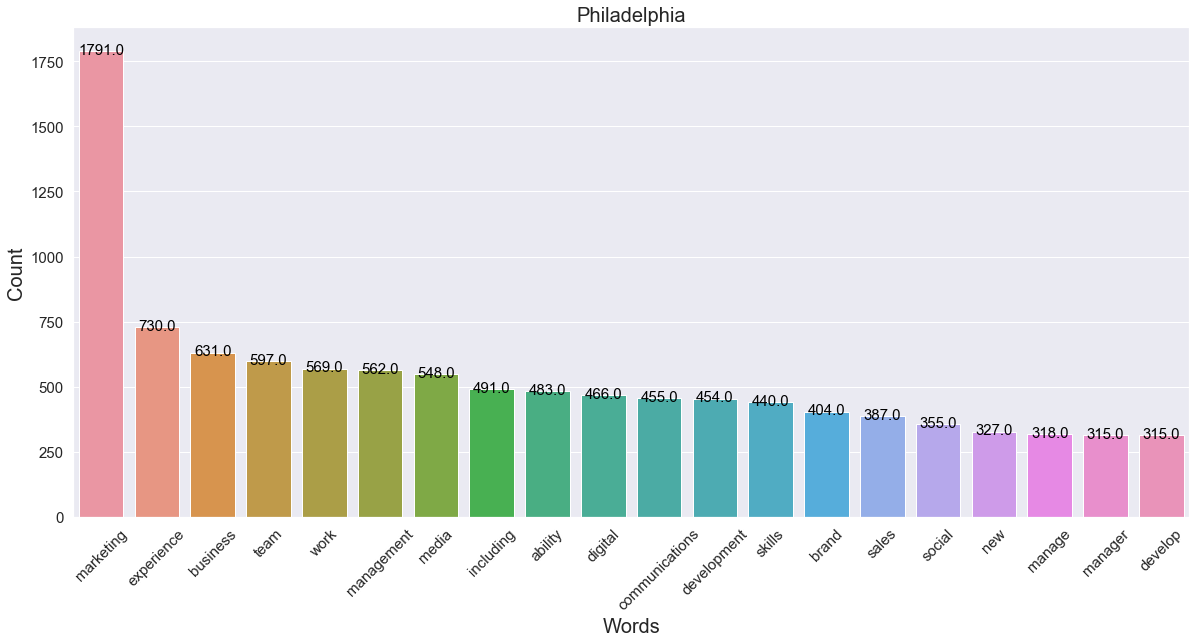

                  ReviewText  count
0               social media    260
1   marketing communications    129
2          digital marketing    124
3          marketing manager    115
4           years experience     88
5            bachelor degree     88
6         project management     83
7           cross functional     79
8          internal external     72
9          equal opportunity     71
10                fast paced     69
11      communication skills     68
12          public relations     61
13        sexual orientation     58
14            skills ability     57
15           sales marketing     56
16      opportunity employer     56
17           national origin     56
18              team members     55
19           gender identity     55


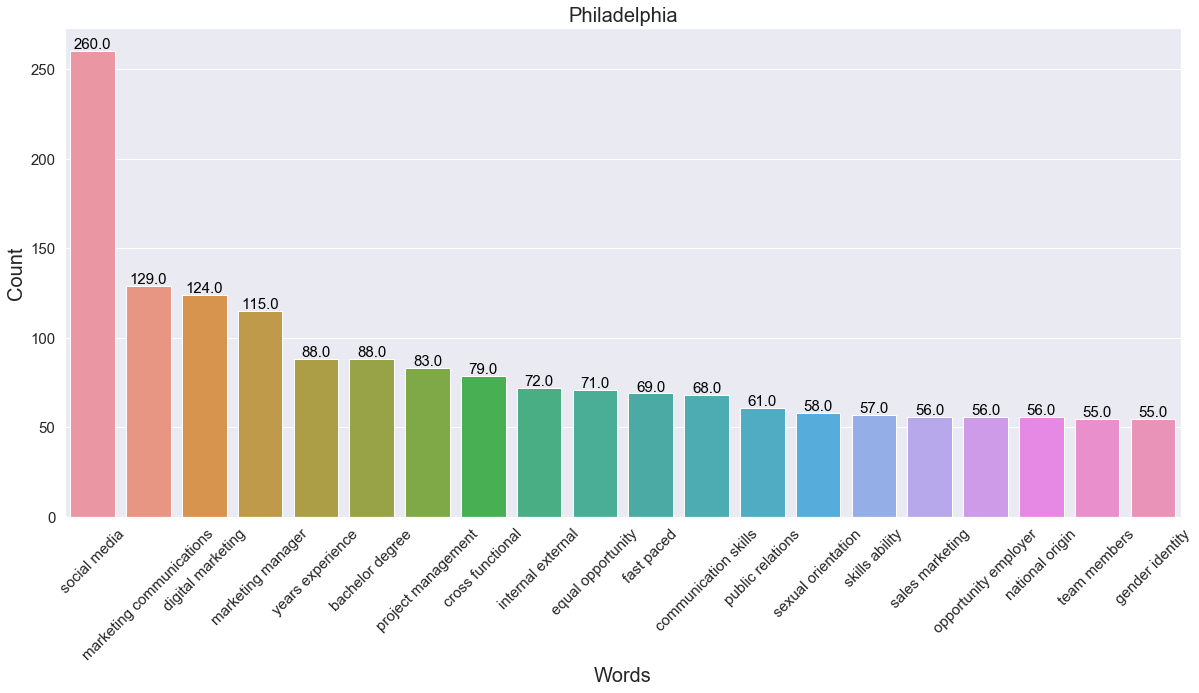

https://www.indeed.com/m/jobs?q=marketing+manager&l=Houston
        ReviewText  count
0        marketing   1802
1       experience    815
2             work    753
3            sales    650
4         business    625
5            media    615
6             team    600
7       management    537
8           social    521
9      development    461
10          skills    452
11         content    400
12         product    390
13         ability    389
14       including    380
15             job    379
16        required    371
17           years    370
18  communications    369
19        customer    360


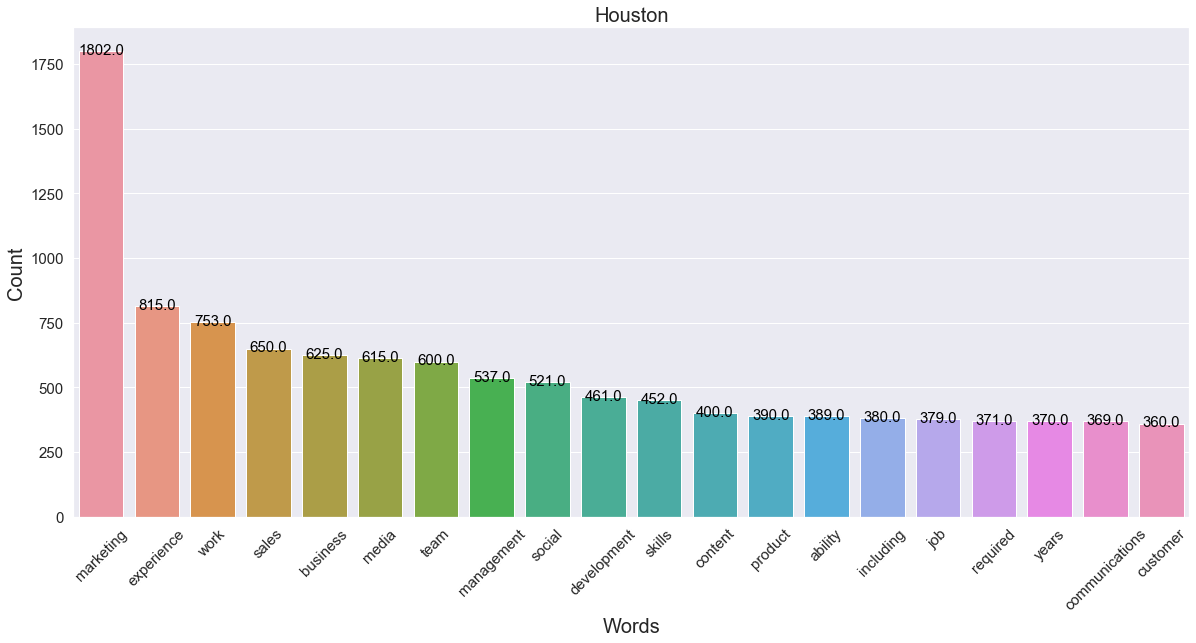

                  ReviewText  count
0               social media    334
1           years experience    114
2          digital marketing    100
3            bachelor degree     89
4            sales marketing     78
5         project management     78
6          internal external     77
7           public relations     72
8                md anderson     71
9   marketing communications     64
10         marketing manager     64
11      communication skills     63
12            marketing team     63
13            skills ability     63
14              ability work     63
15          microsoft office     62
16           ideal candidate     61
17           national origin     61
18              team members     60
19      business development     56


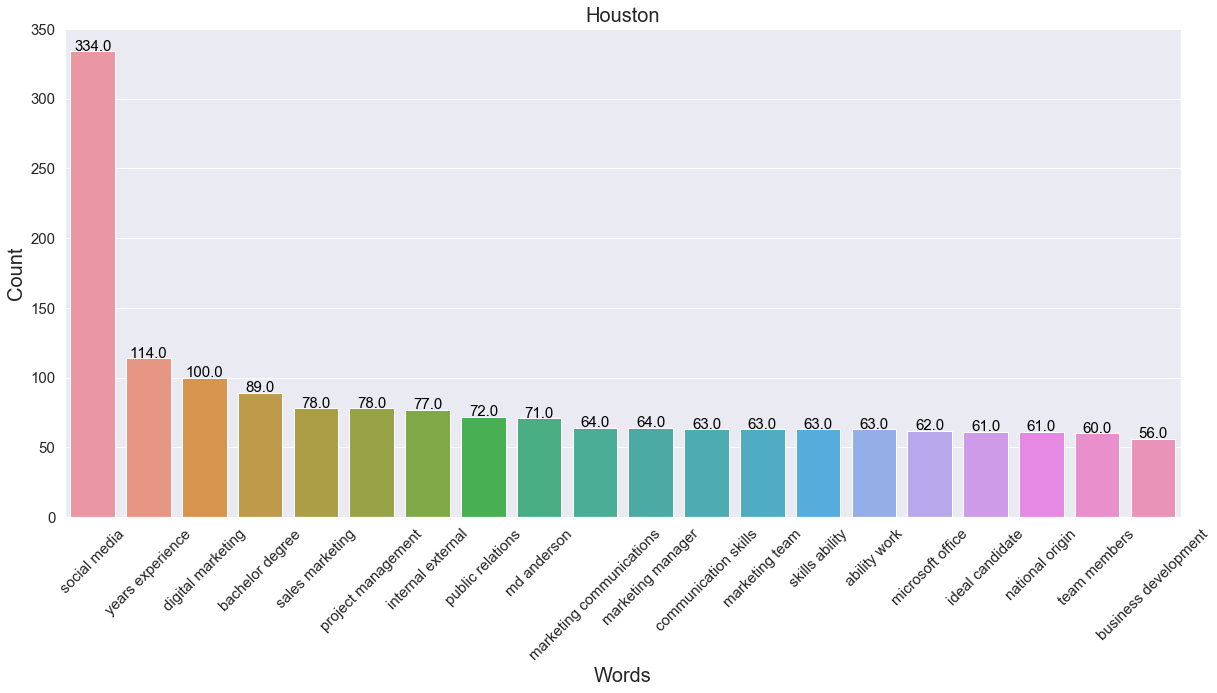

In [19]:
items = {'Washington%2C+DC':20,'New+York':20, 'San+Francisco':20, 'Chicago':20, 'Philadelphia':20, 'Houston':20}
url_test = 'https://www.indeed.com/m/jobs?q=marketing+manager&l={}'
df_all = pd.DataFrame([])
for i in items.items():
    url = url_test.format(i[0])
    print(url)
    df3 = getlink(url,i[1])
    if i[0] == 'Washington%2C+DC':
        single_word(df3, 'Washington DC',i[1])
        bi_word(df3, 'Washington DC',i[1])
    elif i[0] == 'New+York':
        single_word(df3, 'New York',i[1])
        bi_word(df3, 'New York',i[1])
    elif i[0] == 'San+Francisco':
        single_word(df3, 'San Francisco',i[1])
        bi_word(df3, 'San Francisco',i[1])
    else:
        single_word(df3, i[0],i[1])
        bi_word(df3, i[0],i[1])
    df_all = df_all.append(df3)

### All Cities 

        ReviewText  count
0        marketing  10178
1       experience   4091
2             work   3624
3             team   3535
4         business   3056
5            media   2861
6            brand   2812
7       management   2563
8        including   2430
9            sales   2312
10          social   2291
11     development   2147
12          skills   2136
13         content   2119
14         ability   2101
15         digital   2034
16  communications   2024
17             new   1978
18         product   1963
19           years   1833


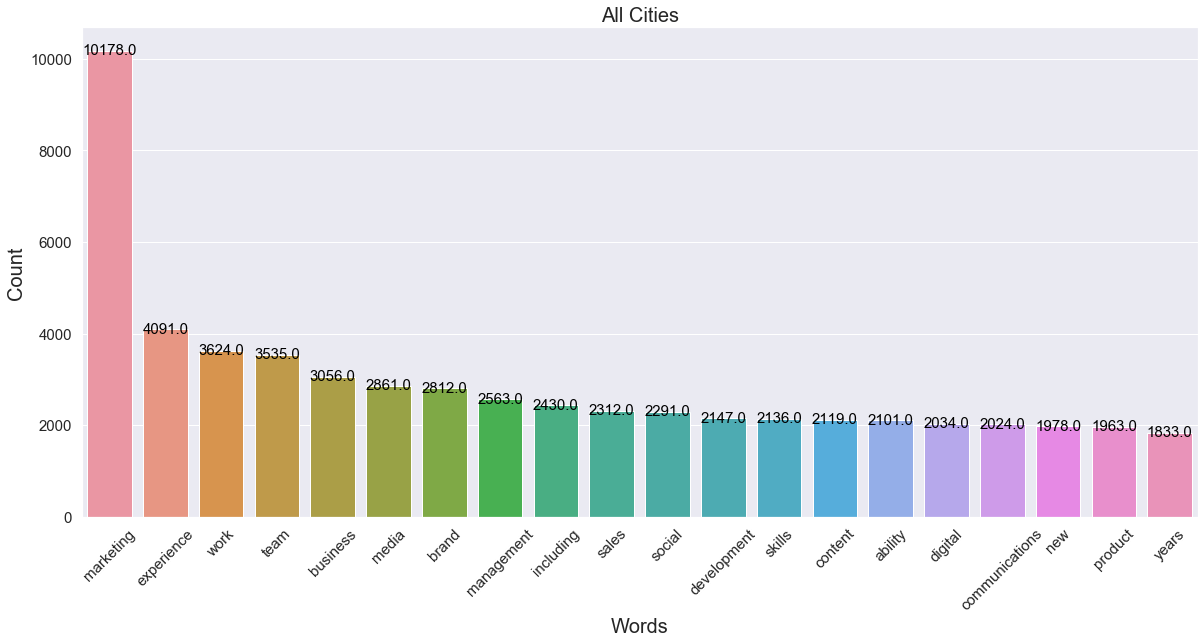

In [20]:
single_word(df_all, 'All Cities', 20)

                  ReviewText  count
0               social media   1416
1          marketing manager    618
2           years experience    601
3           cross functional    554
4   marketing communications    482
5          digital marketing    460
6         project management    434
7          equal opportunity    410
8                 fast paced    402
9             marketing team    393
10           national origin    375
11           bachelor degree    363
12         internal external    359
13        sexual orientation    354
14      communication skills    353
15       marketing campaigns    319
16              team members    316
17            veteran status    315
18        marketing strategy    310
19      opportunity employer    310


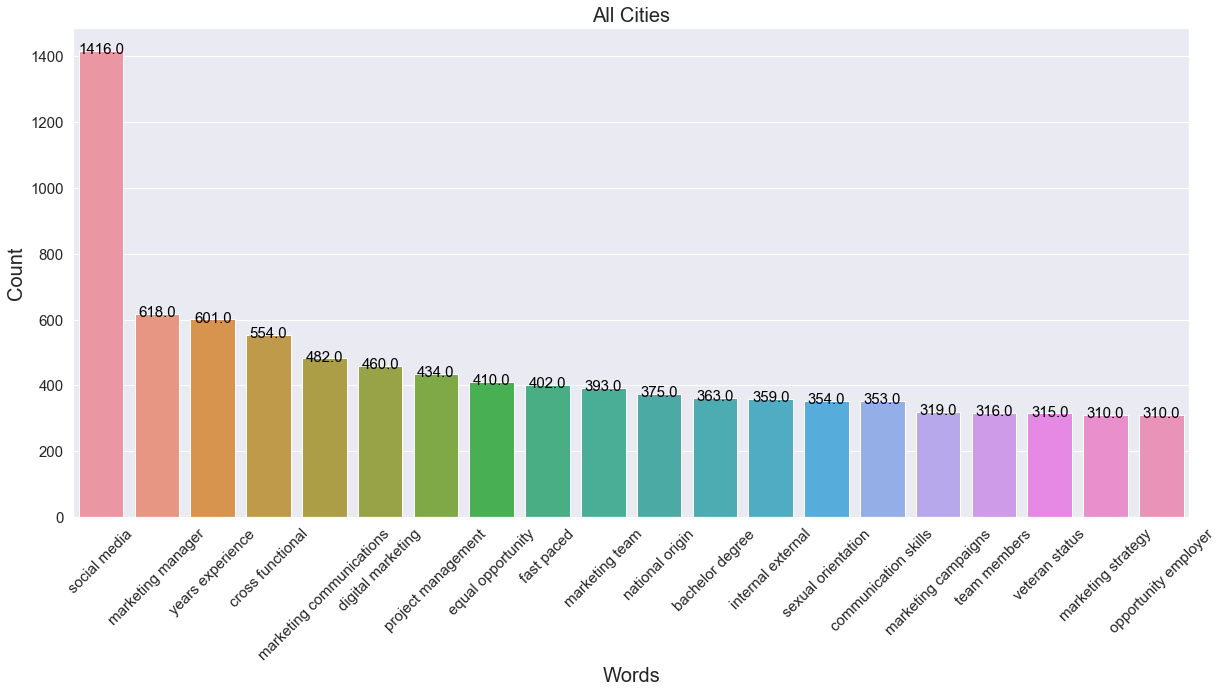

In [21]:
bi_word(df_all, 'All Cities', 20)

### Marketing Director

##### Nationwide

In [22]:
df3 = getlink("https://www.indeed.com/m/jobs?q=marketing+director",50)

In [23]:
get_top_n_words(df3['text'], 50)

[('marketing', 6058),
 ('experience', 1903),
 ('team', 1820),
 ('business', 1474),
 ('brand', 1452),
 ('work', 1437),
 ('sales', 1242),
 ('development', 1134),
 ('including', 1089),
 ('ability', 1071),
 ('strategy', 1027),
 ('management', 1025),
 ('director', 991),
 ('new', 977),
 ('media', 956),
 ('develop', 949),
 ('skills', 924),
 ('market', 883),
 ('years', 837),
 ('digital', 827),
 ('strategic', 777),
 ('creative', 758),
 ('company', 752),
 ('across', 742),
 ('product', 738),
 ('customer', 726),
 ('strategies', 725),
 ('global', 722),
 ('programs', 720),
 ('communications', 719),
 ('strong', 684),
 ('manage', 677),
 ('social', 659),
 ('job', 658),
 ('drive', 643),
 ('leadership', 641),
 ('support', 640),
 ('key', 629),
 ('plans', 620),
 ('position', 612),
 ('ensure', 609),
 ('communication', 581),
 ('teams', 579),
 ('required', 574),
 ('working', 556),
 ('role', 556),
 ('lead', 555),
 ('responsible', 553),
 ('content', 551),
 ('data', 526)]

In [24]:
get_top_n_bigram(df3['text'], 50)

[('social media', 370),
 ('marketing communications', 266),
 ('cross functional', 265),
 ('marketing strategy', 254),
 ('marketing team', 236),
 ('years experience', 225),
 ('equal opportunity', 211),
 ('digital marketing', 210),
 ('marketing director', 201),
 ('director marketing', 199),
 ('fast paced', 187),
 ('marketing plans', 187),
 ('sexual orientation', 183),
 ('marketing strategies', 183),
 ('national origin', 182),
 ('sales marketing', 179),
 ('public relations', 167),
 ('opportunity employer', 164),
 ('marketing experience', 160),
 ('communication skills', 157),
 ('gender identity', 156),
 ('track record', 152),
 ('long term', 151),
 ('internal external', 149),
 ('bachelor degree', 148),
 ('global marketing', 144),
 ('veteran status', 142),
 ('race color', 139),
 ('skills ability', 138),
 ('team members', 137),
 ('brand marketing', 137),
 ('marketing programs', 134),
 ('type full', 123),
 ('marketing campaigns', 121),
 ('marketing plan', 119),
 ('market research', 112),
 ('re

https://www.indeed.com/m/jobs?q=marketing+director&l=Washington%2C+DC
        ReviewText  count
0        marketing   1617
1       experience    675
2             team    563
3             work    487
4   communications    485
5         business    458
6      development    436
7         strategy    377
8            media    369
9       management    341
10           sales    340
11       including    314
12             new    308
13        director    306
14         digital    298


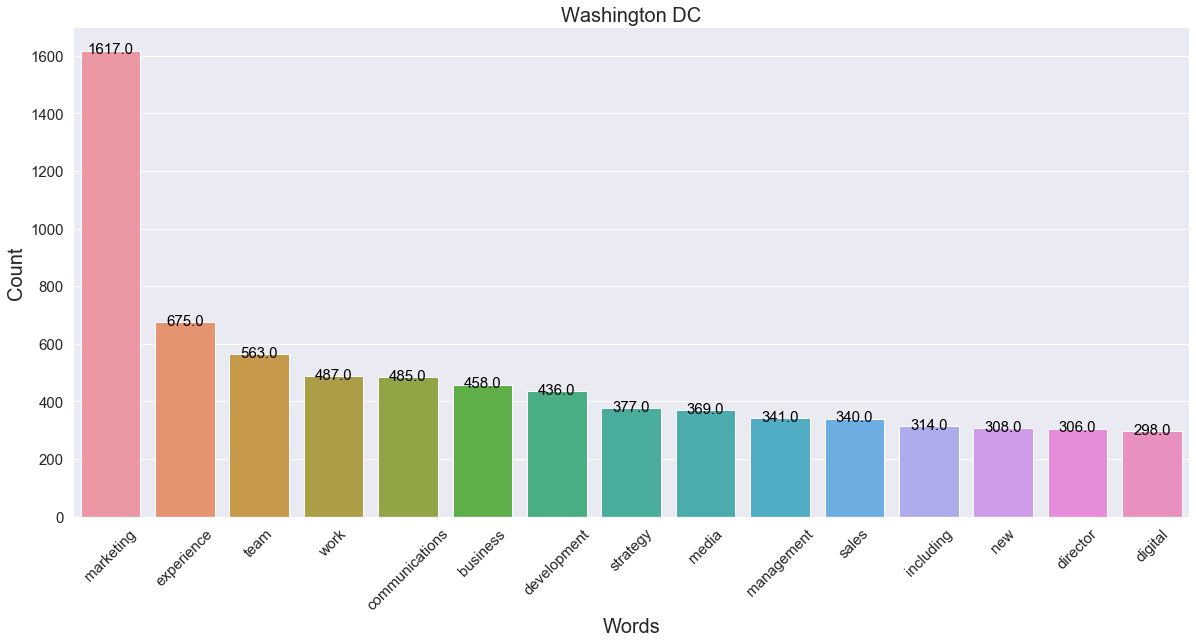

                  ReviewText  count
0   marketing communications    155
1               social media    114
2          digital marketing    100
3          equal opportunity     78
4       business development     78
5           years experience     76
6         marketing strategy     74
7   communications marketing     71
8             share strength     69
9           public relations     62
10            marketing team     56
11           bachelor degree     56
12              track record     55
13           sales marketing     55
14        director marketing     55


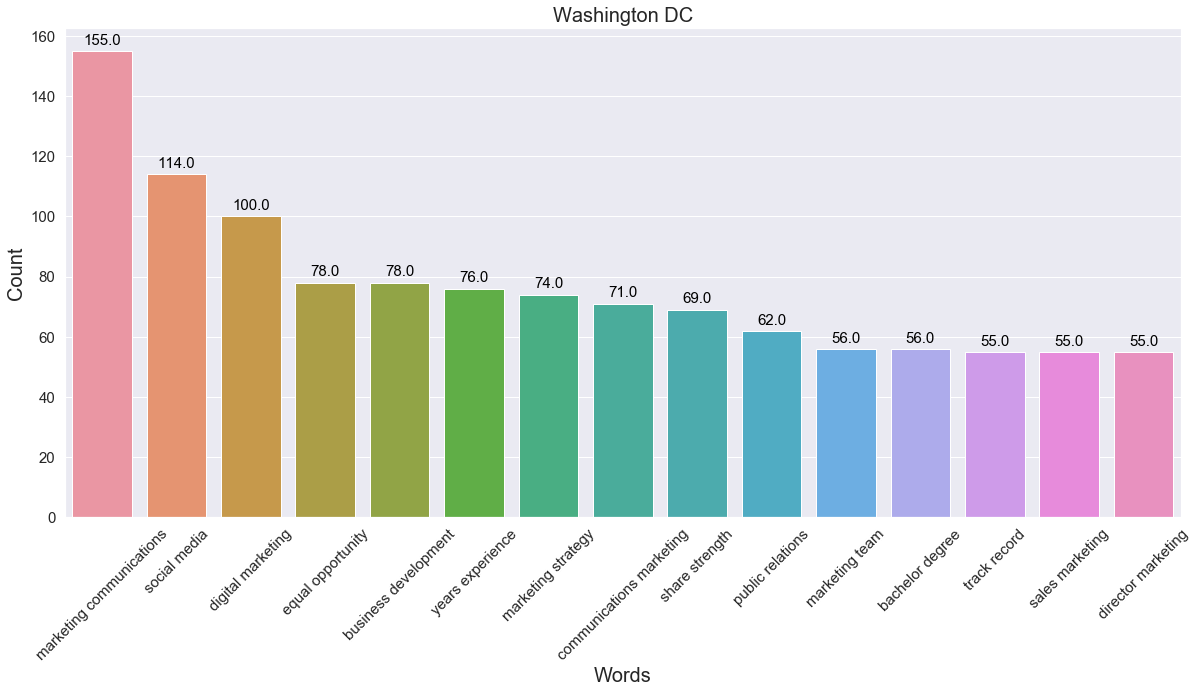

https://www.indeed.com/m/jobs?q=marketing+director&l=New+York
     ReviewText  count
0     marketing   2135
1         brand    649
2    experience    621
3          team    601
4      business    551
5           new    491
6     including    449
7       digital    439
8          work    433
9      strategy    433
10        media    430
11  development    379
12        sales    360
13   management    340
14     creative    340
15     director    335
16      ability    331
17      develop    325
18       across    322
19      company    314


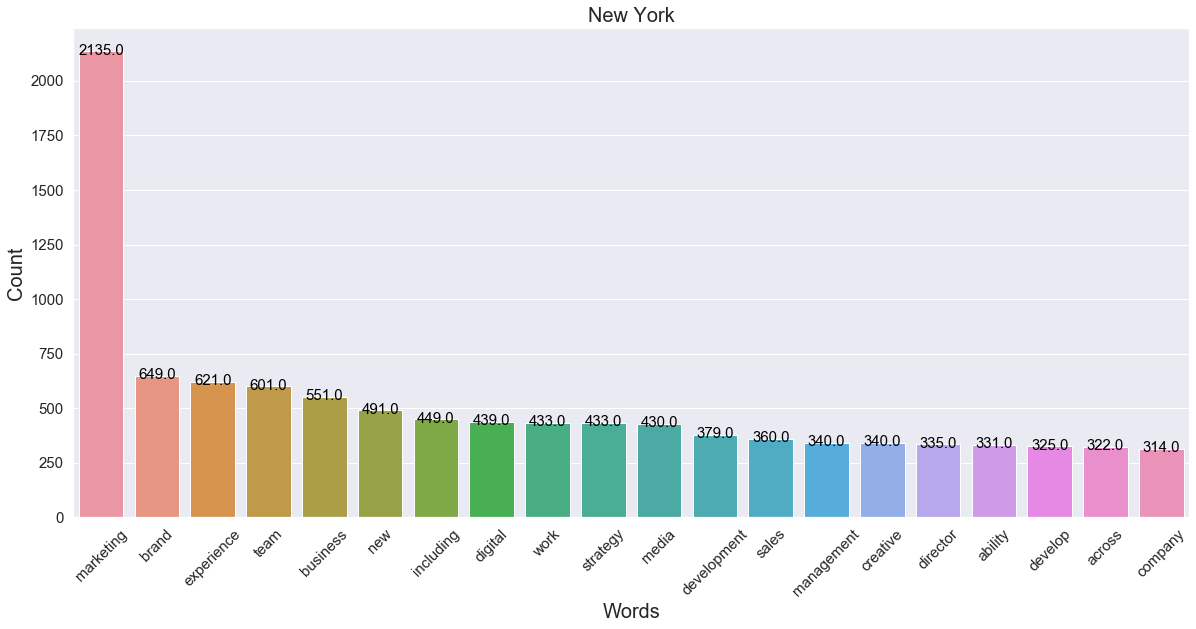

                  ReviewText  count
0               social media    149
1         marketing strategy    122
2                   new york    112
3          digital marketing    112
4   marketing communications     97
5             marketing team     95
6         director marketing     95
7           years experience     93
8           cross functional     84
9          equal opportunity     83
10                fast paced     76
11        sexual orientation     71
12           national origin     69
13              track record     67
14      opportunity employer     60
15           marketing plans     59
16        marketing director     57
17           gender identity     55
18            best practices     55
19                race color     54


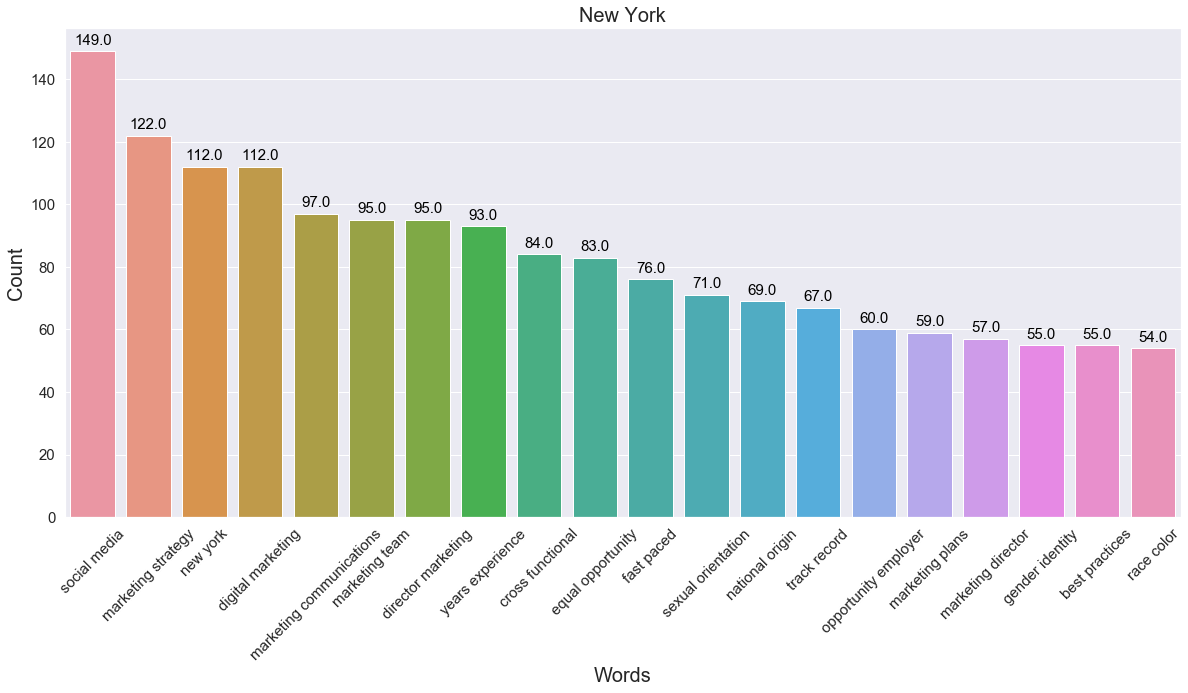

https://www.indeed.com/m/jobs?q=marketing+director&l=San+Francisco
    ReviewText  count
0    marketing   2230
1   experience    835
2         team    815
3      product    735
4         work    542
5     business    517
6        brand    482
7     customer    476
8       across    446
9    including    444
10     company    424
11       sales    414
12    strategy    411
13     digital    387
14         new    383
15       drive    376
16  management    363
17       teams    359
18       years    351
19     develop    342


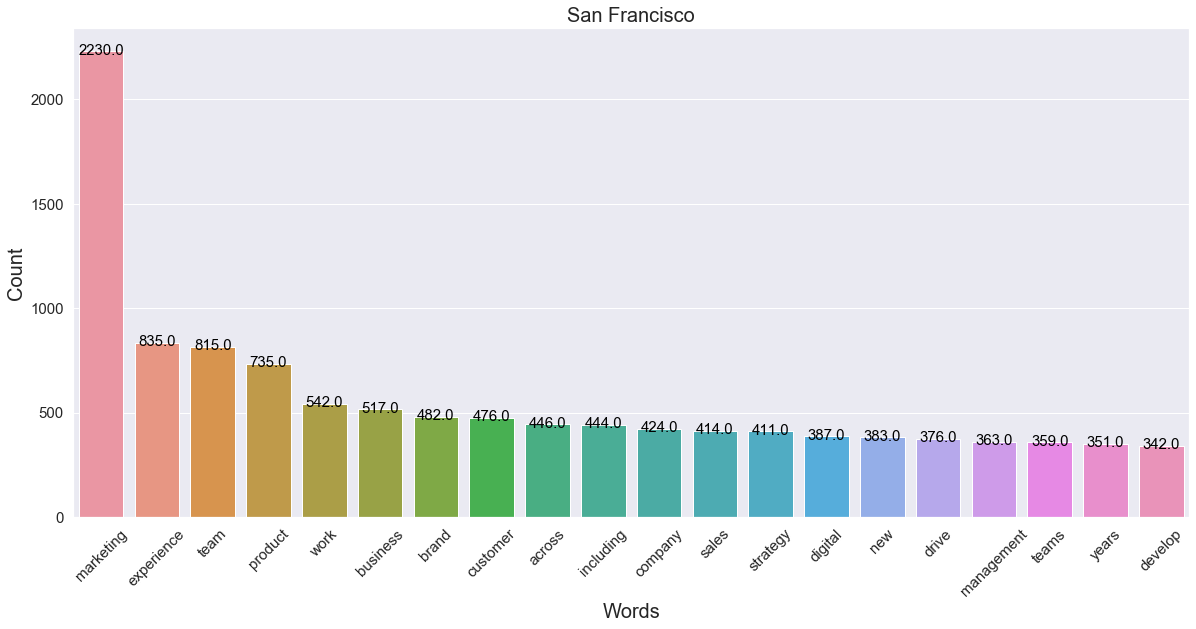

                  ReviewText  count
0          product marketing    171
1              san francisco    145
2           cross functional    138
3             marketing team    128
4               social media    119
5           years experience    116
6               track record    113
7          equal opportunity     95
8         sexual orientation     92
9            national origin     90
10         digital marketing     90
11               data driven     88
12  marketing communications     86
13                fast paced     85
14      marketing experience     82
15           gender identity     82
16        marketing strategy     77
17            veteran status     73
18      qualified applicants     72
19      opportunity employer     69


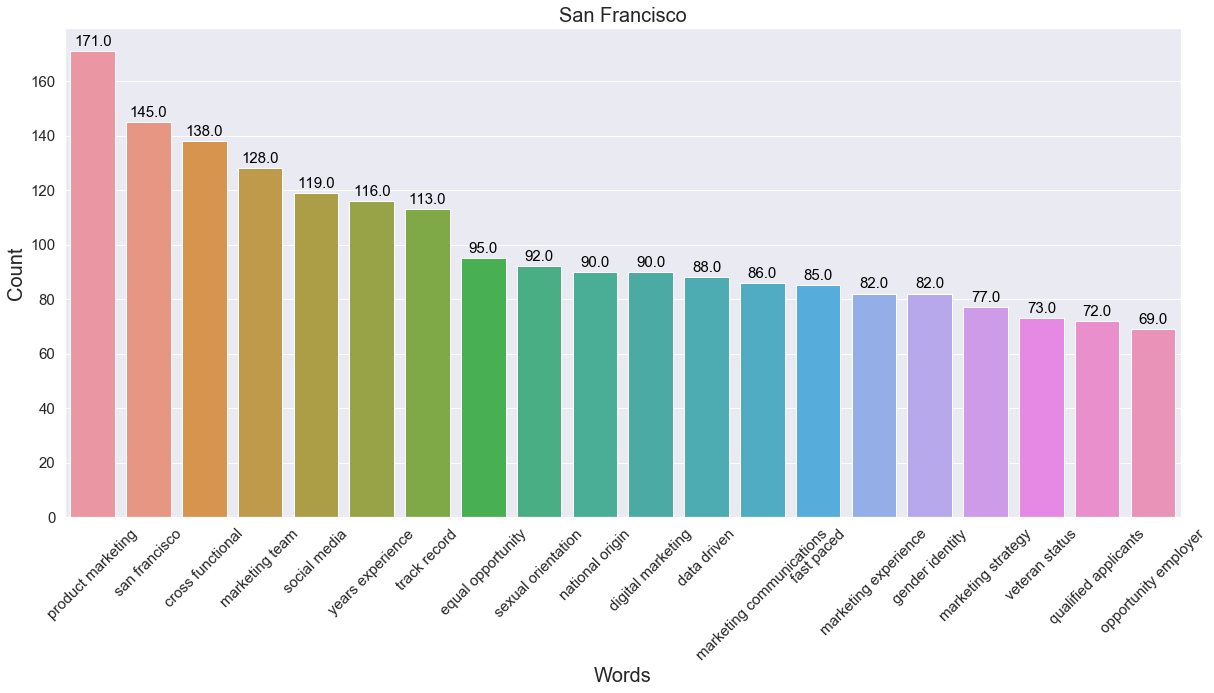

https://www.indeed.com/m/jobs?q=marketing+director&l=Chicago


IndexError: list index out of range

In [26]:
items = {'Washington%2C+DC':15,'New+York':20, 'San+Francisco':20, 'Chicago':20, 'Philadelphia':10, 'Houston':10}
url_test = 'https://www.indeed.com/m/jobs?q=marketing+director&l={}'
df_all2 = pd.DataFrame([])
for i in items.items():
    url = url_test.format(i[0])
    print(url)
    df3 = getlink(url,i[1])
    if i[0] == 'Washington%2C+DC':
        single_word(df3, 'Washington DC',i[1])
        bi_word(df3, 'Washington DC',i[1])
    elif i[0] == 'New+York':
        single_word(df3, 'New York',i[1])
        bi_word(df3, 'New York',i[1])
    elif i[0] == 'San+Francisco':
        single_word(df3, 'San Francisco',i[1])
        bi_word(df3, 'San Francisco',i[1])
    else:
        single_word(df3, i[0],i[1])
        bi_word(df3, i[0],i[1])
    df_all2 = df_all2.append(df3)

        ReviewText  count
0        marketing   5982
1       experience   2131
2             team   1979
3         business   1526
4             work   1462
5            brand   1358
6          product   1273
7         strategy   1221
8        including   1207
9              new   1182
10     development   1130
11         digital   1124
12           sales   1114
13           media   1083
14  communications   1066
15      management   1044
16          across    989
17         develop    932
18        customer    905
19        director    900


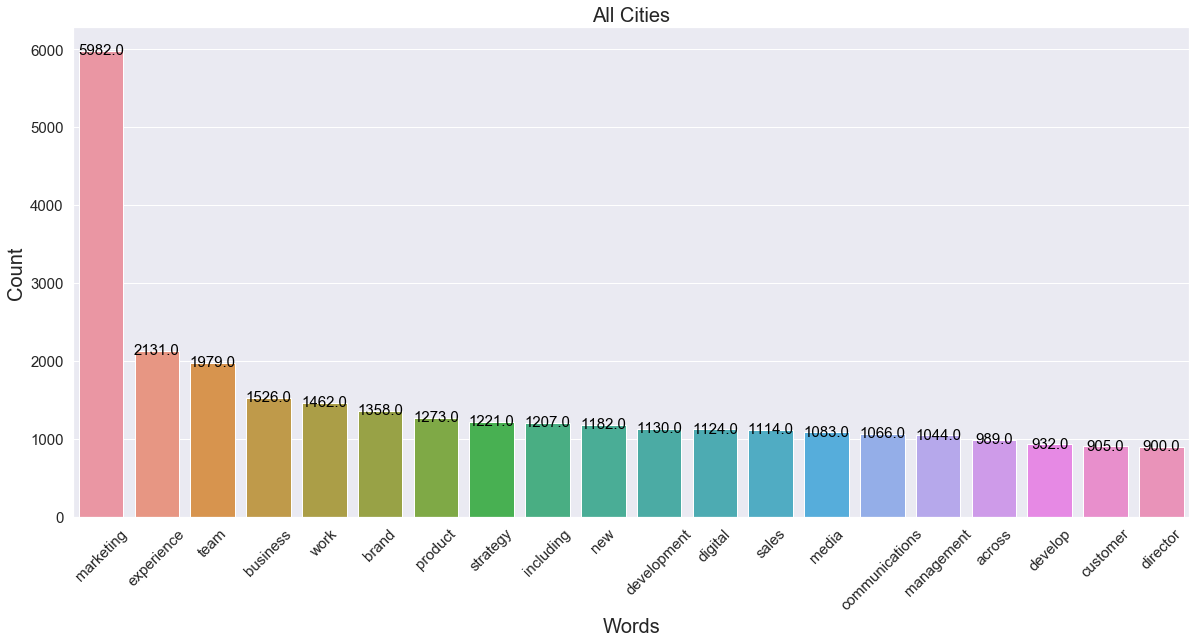

In [27]:
single_word(df_all2, 'All Cities', 20)

                  ReviewText  count
0               social media    382
1   marketing communications    338
2          digital marketing    302
3           years experience    285
4             marketing team    279
5         marketing strategy    273
6          equal opportunity    256
7           cross functional    252
8          product marketing    248
9               track record    235
10           national origin    212
11        sexual orientation    204
12                fast paced    203
13        director marketing    190
14      opportunity employer    179
15           gender identity    176
16      marketing experience    172
17            veteran status    171
18             san francisco    157
19           bachelor degree    157


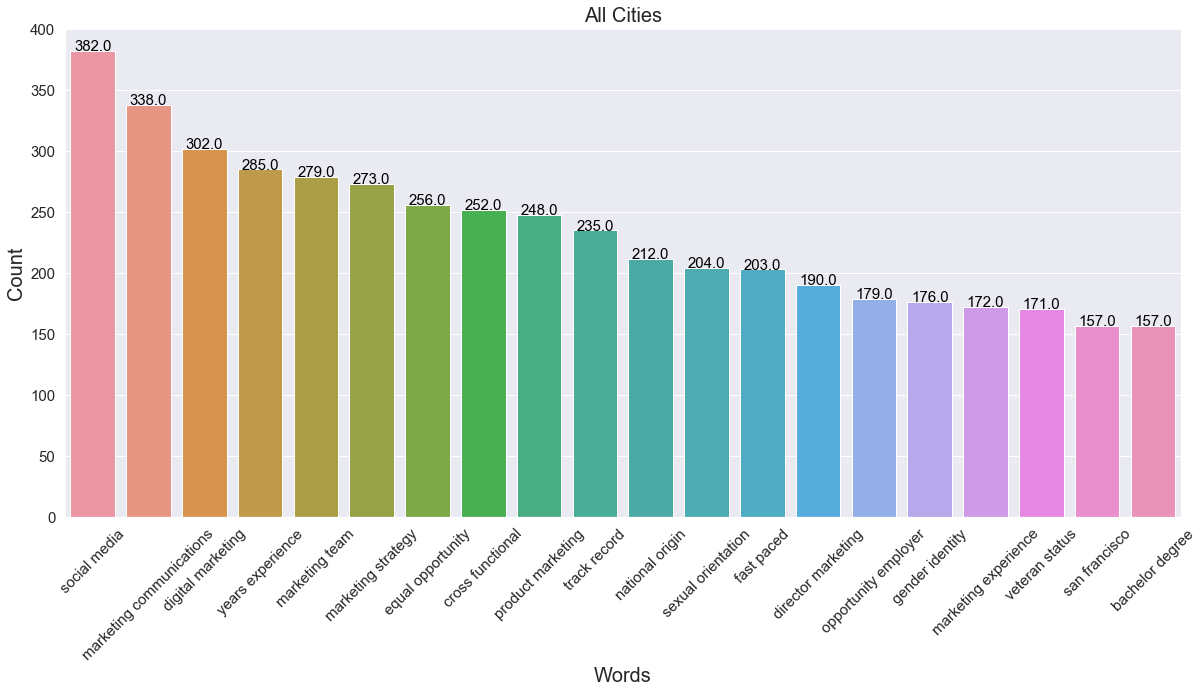

In [28]:
bi_word(df_all2, 'All Cities', 20)

### Scrapping skills from city

#### Marketing Manager

In [35]:
def count_in(x):
    if len(x) == 0:
        return(0)
    else:
        return(1)


def getlink2(url,x):
    lang = ["PowerPoint", "Forecasting", "SQL","Tableau", "Excel", "SAS", "SAP",
           "Communication", 'Problem_Solving','Analytical_Skills','Outlook', "Critical_Thinking",
           "Salesforce", 'Teamwork', 'Soical Media','Sales', 'Digital Marketing',
           'Public Relation']
    df2 = pd.DataFrame([], columns = lang)
    for i in range(x): 
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs={'rel':['nofollow']})
        for c in all_matches:
            sum_py = 0
            sum_pp = 0
            sum_fcast = 0
            sum_sql = 0
            sum_tableau = 0
            sum_ex = 0 
            sum_sap = 0
            sum_sas = 0
            sum_com = 0
            sum_ps = 0 
            sum_ays = 0
            sum_out = 0 
            sum_ct = 0
            sum_qs = 0
            sum_tm = 0
            sum_sm = 0 
            sum_ss = 0
            sum_dm = 0
            sum_pr = 0
            
            jd_url = 'http://www.indeed.com/m/'+c['href']
            response = urlopen(jd_url)
            jd_soup = BeautifulSoup(response, 'lxml')
            jd_desc = jd_soup.findAll('div',attrs={'id':['desc']})
            
            pp = re.findall(r'[\/\s\b]Power[Pp]oint[\/\b\s,]?', str(jd_desc))
            pp2 = count_in(pp)
            sum_pp = sum_pp + pp2

            fcast = re.findall(r'[\s\/\b]?[Ff]orecasting[\b\s\/,]', str(jd_desc))
            fcast2 = count_in(fcast)
            sum_fcast = sum_fcast + fcast2

            sql = re.findall(r'[\/\b]?SQL[\s\/,]?', str(jd_desc))
            sql2 = count_in(sql)
            sum_sql = sum_sql + sql2
            
            excel = re.findall(r'[\/\b\/]?[Ee]xcel[\s\/,]?', str(jd_desc))
            ex2 = count_in(excel)
            sum_ex = sum_ex + ex2

            sap = re.findall(r'[\/\b]?SAP[\s\/,]?', str(jd_desc))
            sap2 = count_in(sap)
            sum_sap = sum_sap + sap2

            tableau = re.findall(r'[\/\b\/]?Tableau[\s\/,]?', str(jd_desc))
            tab2 = count_in(tableau)
            sum_tableau = sum_tableau + tab2
            
            sas = re.findall(r'[\/\b\/]?SAS[\s\/,]?', str(jd_desc))
            sas2 = count_in(sas)
            sum_sas = sum_sas + sas2
            
            com = re.findall(r'[\/\b]?[Cc]ommunication[\s\/,]?', str(jd_desc))
            com2 = count_in(com)
            sum_com = sum_com + com2
            
            ps = re.findall(r'[\/\b]?[Pp]roblem\s[Ss]olving[\s\/,]?', str(jd_desc))
            ps2 = count_in(ps)
            sum_ps = sum_ps + ps2
            
            ays = re.findall(r'[\/\b]?[Aa]nalytical\s[Ss]kills[\s\/,]?', str(jd_desc))
            ays2 = count_in(ays)
            sum_ays = sum_ays + ays2
            
            out = re.findall(r'[\/\b]?[Oo]utlook[\s\/,]?', str(jd_desc))
            out2 = count_in(out)
            sum_out = sum_out + out2
            
            ct = re.findall(r'[\/\b]?[Cc]ritical\s[Tt]hinking[\s\/,]?', str(jd_desc))
            ct2 = count_in(ct)
            sum_ct = sum_ct + ct2
            
            qs = re.findall(r'[\/\b]?[Ss]alesforce[\s\/,]?', str(jd_desc))
            qs2 = count_in(qs)
            sum_qs = sum_qs + qs2
            
            tm = re.findall(r'[\/\b]?[Tt]eamwork[\s\/,]?', str(jd_desc))
            tm2 = count_in(tm)
            sum_tm = sum_tm + tm2
            
            sm = re.findall(r'[\/\b]?[Ss]ocial\s[Mm]edia[\s\/,]?', str(jd_desc))
            sm = count_in(sm)
            sum_sm = sum_sm + sm
            
            ss = re.findall(r'[\/\b]?[Ss]ales[\s\/,]?', str(jd_desc))
            ss = count_in(ss)
            sum_ss = sum_ss + ss
            
            dm = re.findall(r'[\/\b]?[Dd]igital\s[Mm]arketing[\s\/,]?', str(jd_desc))
            dm = count_in(dm)
            sum_dm = sum_dm + dm
            
            pr = re.findall(r'[\/\b]?[Pp]ublic\s[Rr]elations[\s\/,]?', str(jd_desc))
            pr = count_in(pr)
            sum_pr = sum_pr + pr
            
            df = pd.DataFrame([[sum_pp,sum_fcast,sum_sql,sum_tableau,sum_ex ,
            sum_sap ,sum_sas,sum_com,sum_ps,sum_ays,sum_out,sum_ct,sum_qs, sum_tm,sum_sm,sum_ss,
                              sum_dm,sum_pr ]], columns = lang)
            df2 = pd.concat([df,df2], axis =0)
            

        url_all = soup.findAll(attrs={'rel':['next']})
        
        url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
        
    df2.reset_index(inplace = True)
    df2.drop('index', inplace = True, axis = 1)
    df3 = df2.sum(axis = 0)
    df4 = pd.DataFrame(df3, columns = ['Count'])
    df4.reset_index(inplace = True)
    df4.rename({'index': 'skills'}, inplace = True, axis = 1)
    t_job = len(df2)
    print('Total Jobs:', len(df2))
    return(df4, t_job)

In [40]:
def plot_count2(x,total, title):
    sns.set()
    print('Number of Jobs:', total)
    print(x)
    fig = plt.figure(figsize = (16,8))
    sns.barplot(x='skills', y='Count', data=x).set_title(title,fontsize=20)
    plt.xticks(rotation=45, fontsize = 13)
    plt.xlabel('Skills',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, height + 1.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')
    plt.show()
        


### Nationwide

In [37]:
nw_count, nw_total = getlink2("https://www.indeed.com/m/jobs?q=marketing+manager",30)

Total Jobs: 328


Number of Jobs: 328
               skills  Count
0          PowerPoint   38.0
1         Forecasting   19.0
2                 SQL    2.0
3             Tableau    2.0
4               Excel  190.0
5                 SAS    3.0
6                 SAP    0.0
7       Communication  227.0
8     Problem_Solving   15.0
9   Analytical_Skills   19.0
10            Outlook   16.0
11  Critical_Thinking    9.0
12         Salesforce   12.0
13           Teamwork   16.0
14       Soical Media  122.0
15              Sales  191.0
16  Digital Marketing   71.0
17    Public Relation   30.0


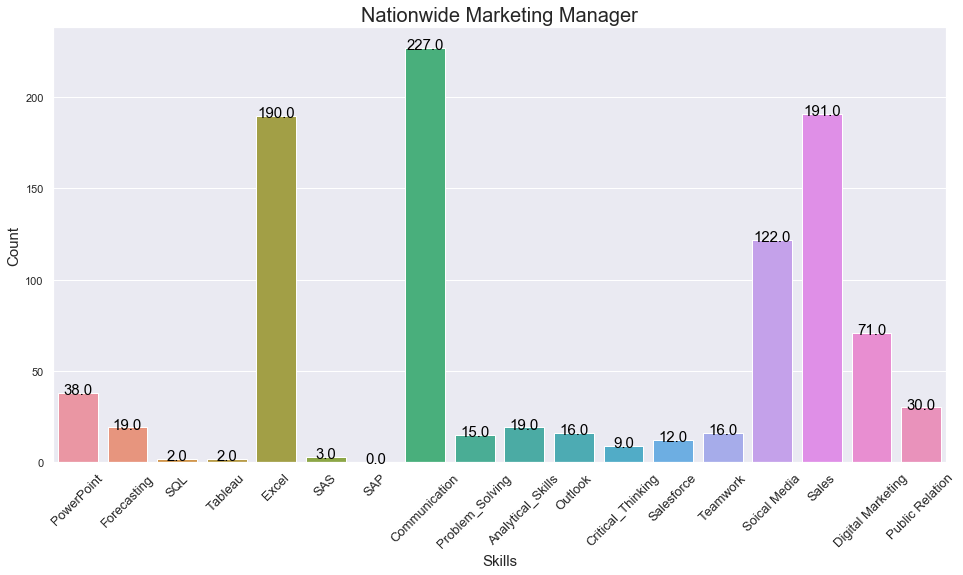

In [38]:
plot_count2(nw_count, nw_total, 'Nationwide Marketing Manager')

https://www.indeed.com/m/jobs?q=marketing+manager&l=Washington%2C+DC
Total Jobs: 310
Number of Jobs: 310
               skills  Count
0          PowerPoint   41.0
1         Forecasting    3.0
2                 SQL    1.0
3             Tableau    6.0
4               Excel  180.0
5                 SAS    0.0
6                 SAP    0.0
7       Communication  241.0
8     Problem_Solving   21.0
9   Analytical_Skills   19.0
10            Outlook   19.0
11  Critical_Thinking    5.0
12         Salesforce   24.0
13           Teamwork   18.0
14       Soical Media  122.0
15              Sales  127.0
16  Digital Marketing   55.0
17    Public Relation   56.0


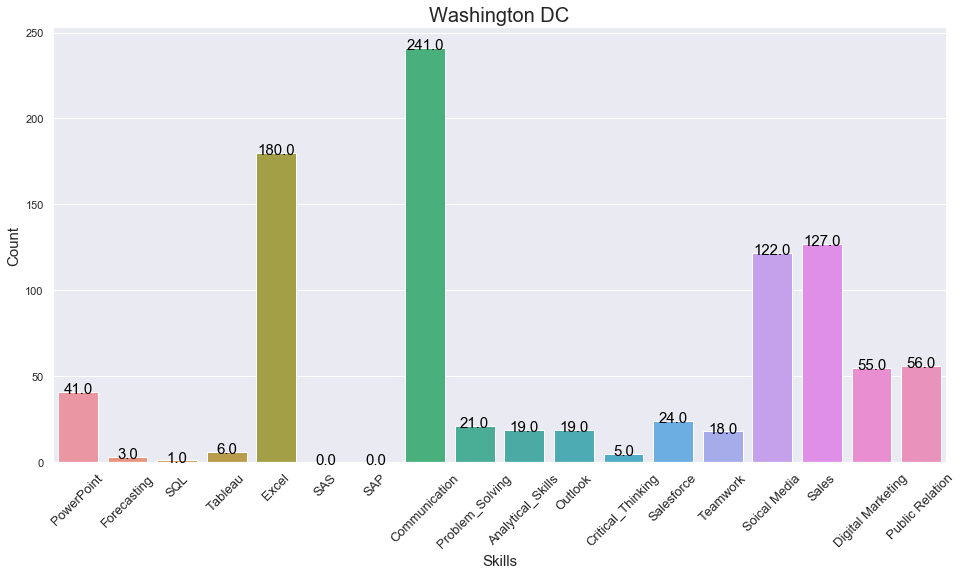

https://www.indeed.com/m/jobs?q=marketing+manager&l=New+York
Total Jobs: 316
Number of Jobs: 316
               skills  Count
0          PowerPoint   62.0
1         Forecasting   18.0
2                 SQL    6.0
3             Tableau    7.0
4               Excel  200.0
5                 SAS    2.0
6                 SAP    1.0
7       Communication  236.0
8     Problem_Solving   18.0
9   Analytical_Skills   18.0
10            Outlook   13.0
11  Critical_Thinking    7.0
12         Salesforce   15.0
13           Teamwork   15.0
14       Soical Media  104.0
15              Sales  170.0
16  Digital Marketing   71.0
17    Public Relation   15.0


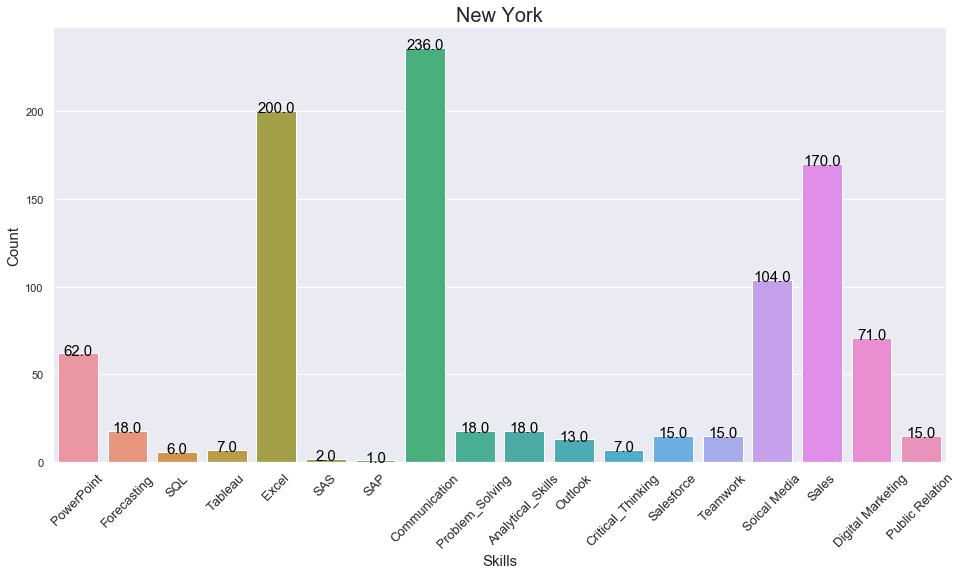

https://www.indeed.com/m/jobs?q=marketing+manager&l=San+Francisco
Total Jobs: 398
Number of Jobs: 398
               skills  Count
0          PowerPoint   29.0
1         Forecasting   12.0
2                 SQL   16.0
3             Tableau    6.0
4               Excel  209.0
5                 SAS    2.0
6                 SAP    0.0
7       Communication  297.0
8     Problem_Solving   34.0
9   Analytical_Skills   38.0
10            Outlook   13.0
11  Critical_Thinking   17.0
12         Salesforce   65.0
13           Teamwork   16.0
14       Soical Media  105.0
15              Sales  199.0
16  Digital Marketing   68.0
17    Public Relation   32.0


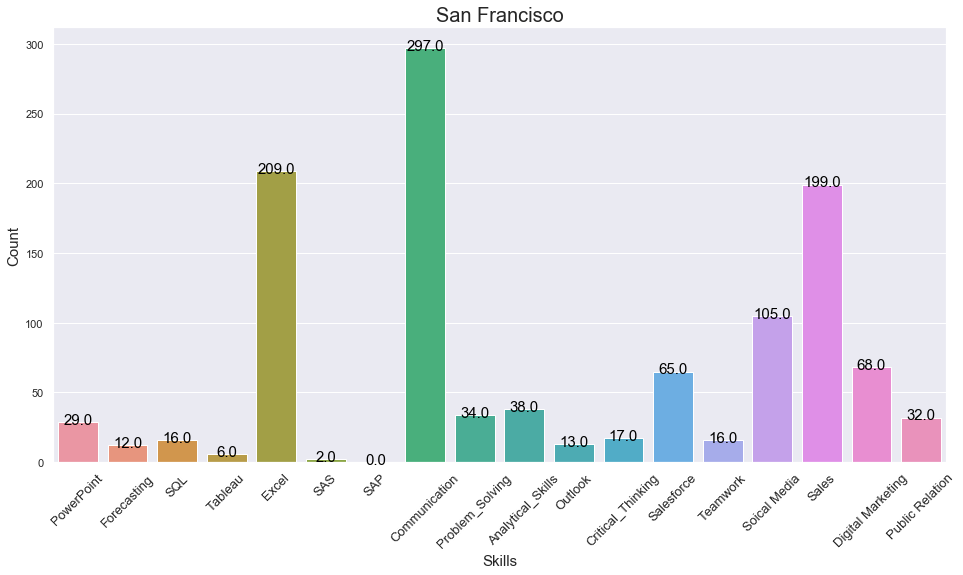

https://www.indeed.com/m/jobs?q=marketing+manager&l=Chicago
Total Jobs: 371
Number of Jobs: 371
               skills  Count
0          PowerPoint   47.0
1         Forecasting   13.0
2                 SQL    9.0
3             Tableau    5.0
4               Excel  203.0
5                 SAS    0.0
6                 SAP    2.0
7       Communication  278.0
8     Problem_Solving   29.0
9   Analytical_Skills   24.0
10            Outlook   16.0
11  Critical_Thinking   13.0
12         Salesforce   31.0
13           Teamwork   10.0
14       Soical Media  114.0
15              Sales  209.0
16  Digital Marketing   79.0
17    Public Relation   61.0


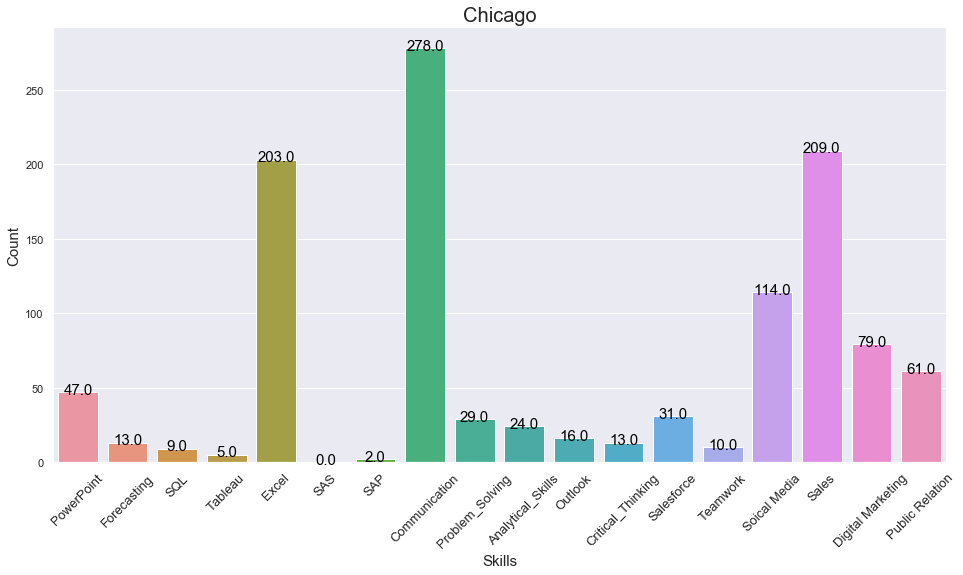

https://www.indeed.com/m/jobs?q=marketing+manager&l=Philadelphia
Total Jobs: 228
Number of Jobs: 228
               skills  Count
0          PowerPoint   36.0
1         Forecasting   12.0
2                 SQL    1.0
3             Tableau    4.0
4               Excel  150.0
5                 SAS    6.0
6                 SAP    0.0
7       Communication  172.0
8     Problem_Solving   24.0
9   Analytical_Skills   20.0
10            Outlook   16.0
11  Critical_Thinking    9.0
12         Salesforce   16.0
13           Teamwork   27.0
14       Soical Media   70.0
15              Sales  126.0
16  Digital Marketing   52.0
17    Public Relation   29.0


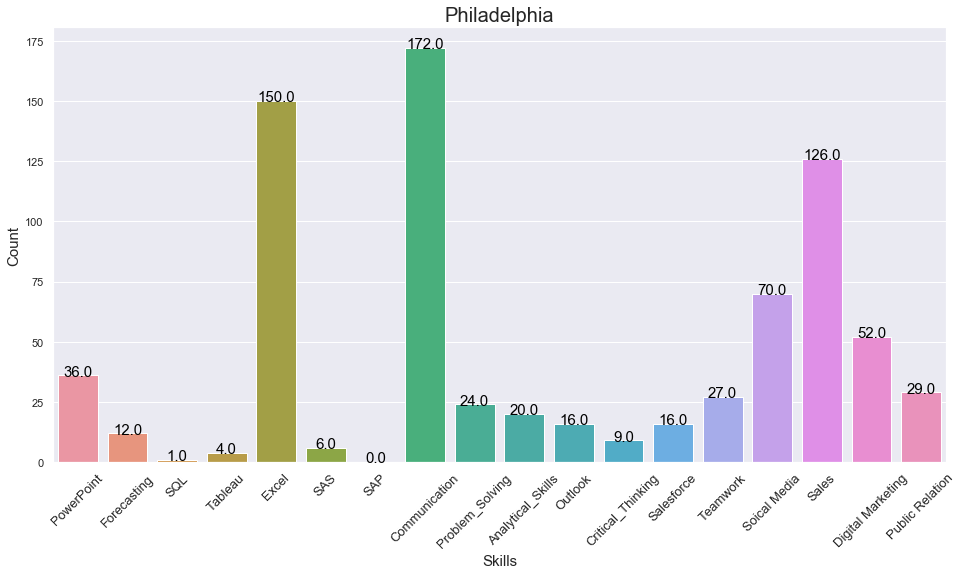

https://www.indeed.com/m/jobs?q=marketing+manager&l=Houston
Total Jobs: 282
Number of Jobs: 282
               skills  Count
0          PowerPoint   43.0
1         Forecasting    3.0
2                 SQL    3.0
3             Tableau    6.0
4               Excel  172.0
5                 SAS    5.0
6                 SAP    0.0
7       Communication  238.0
8     Problem_Solving   31.0
9   Analytical_Skills   16.0
10            Outlook   33.0
11  Critical_Thinking    5.0
12         Salesforce   16.0
13           Teamwork   20.0
14       Soical Media   93.0
15              Sales  144.0
16  Digital Marketing   52.0
17    Public Relation   33.0


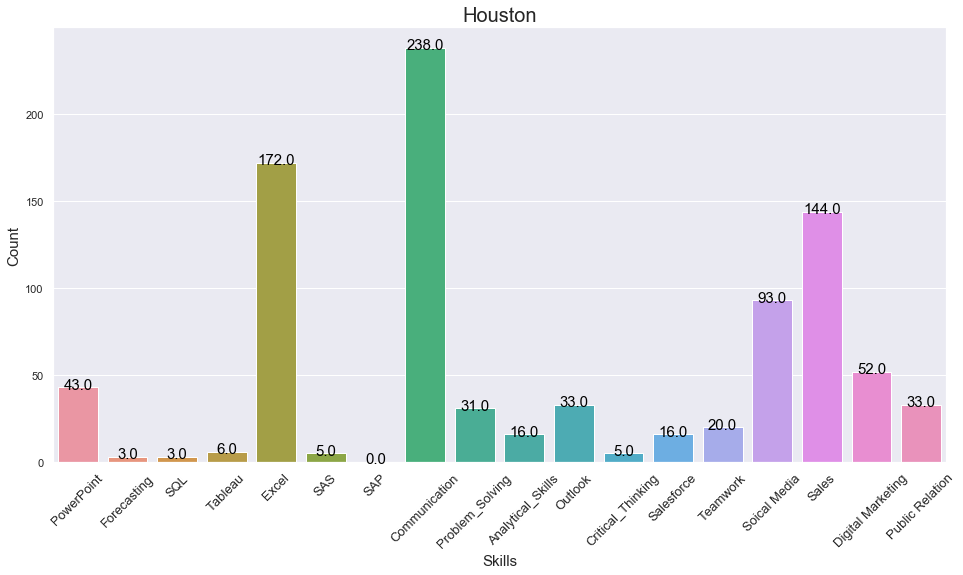

In [42]:
items = {'Washington%2C+DC':30,'New+York':30, 'San+Francisco':30, 'Chicago':30, 'Philadelphia':20, 'Houston':20}
url_test = 'https://www.indeed.com/m/jobs?q=marketing+manager&l={}'
df_count_all = pd.DataFrame([])
for i in items.items():
    url = url_test.format(i[0])
    print(url)
    df_count, df_total = getlink2(url,i[1])
    if i[0] == 'Washington%2C+DC':
        plot_count2(df_count, df_total, 'Washington DC')
        df_count['City'] = 'Washington DC'
    elif i[0] == 'New+York':
        plot_count2(df_count, df_total, 'New York')
        df_count['City'] = 'New York'
    elif i[0] == 'San+Francisco':
        plot_count2(df_count, df_total, 'San Francisco')
        df_count['City'] = 'San Francisco'
    else:
        plot_count2(df_count, df_total,i[0] )
        df_count['City'] = i[0]
    df_count['Title'] = 'Manager'
    df_count_all = df_count_all.append(df_count)

In [47]:
df_mm = df_count_all.groupby('skills').agg({'Count':'sum'}).reset_index()
df_mm

,skills,Count
0,Analytical_Skills,135.0
1,Communication,1462.0
2,Critical_Thinking,56.0
3,Digital Marketing,377.0
4,Excel,1114.0
5,Forecasting,61.0
6,Outlook,110.0
7,PowerPoint,258.0
8,Problem_Solving,157.0
9,Public Relation,226.0


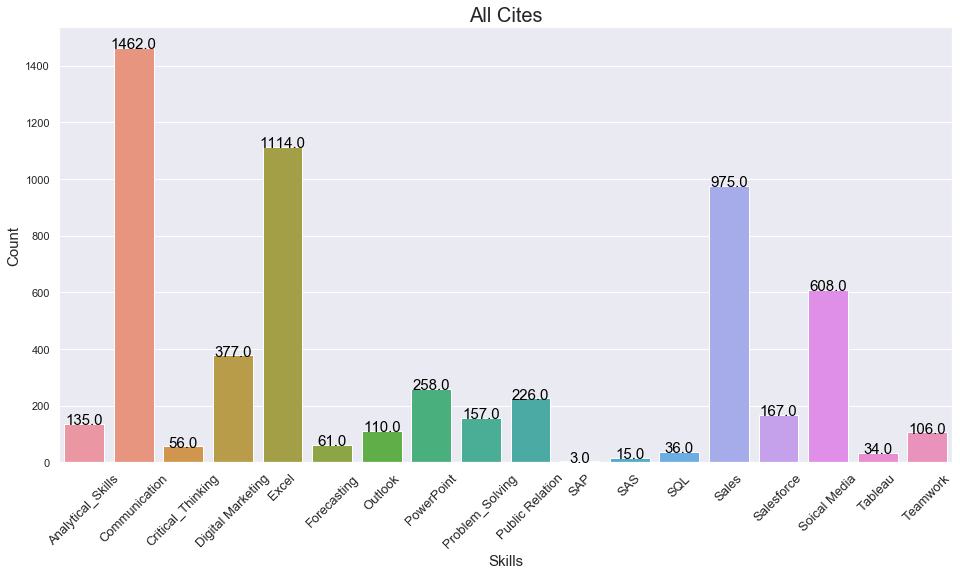

In [53]:
fig = plt.figure(figsize = (16,8))
sns.barplot(x='skills', y='Count', data=df_mm).set_title('All Cites',fontsize=20)
plt.xticks(rotation=45, fontsize = 13)
plt.xlabel('Skills',fontsize=15)
plt.ylabel('Count',fontsize=15)
ax = plt.gca()
for nr, p in enumerate(ax.patches):
    height = round(p.get_height(),0)
    ax.text(nr, int(height) + 12.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')

### Marketing Directors

#### Nationwide

In [55]:
nw_count2, nw_total2 = getlink2("https://www.indeed.com/m/jobs?q=marketing+director",30)

Total Jobs: 329


Number of Jobs: 329
               skills  Count
0          PowerPoint   23.0
1         Forecasting   14.0
2                 SQL    4.0
3             Tableau    2.0
4               Excel  153.0
5                 SAS    4.0
6                 SAP    1.0
7       Communication  220.0
8     Problem_Solving   20.0
9   Analytical_Skills   17.0
10            Outlook    9.0
11  Critical_Thinking    8.0
12         Salesforce   16.0
13           Teamwork   26.0
14       Soical Media  107.0
15              Sales  189.0
16  Digital Marketing   70.0
17    Public Relation   59.0


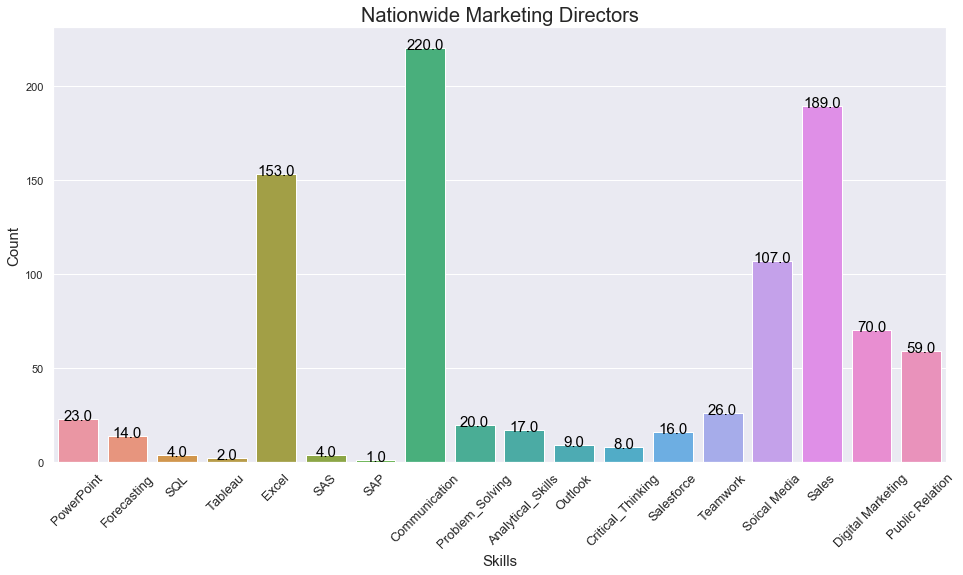

In [57]:
plot_count2(nw_count2, nw_total2, 'Nationwide Marketing Directors')

https://www.indeed.com/m/jobs?q=marketing+director&l=Washington%2C+DC
Total Jobs: 98
Number of Jobs: 98
               skills  Count
0          PowerPoint    7.0
1         Forecasting    4.0
2                 SQL    0.0
3             Tableau    2.0
4               Excel   48.0
5                 SAS    0.0
6                 SAP    0.0
7       Communication   69.0
8     Problem_Solving    8.0
9   Analytical_Skills    2.0
10            Outlook    1.0
11  Critical_Thinking    4.0
12         Salesforce   14.0
13           Teamwork    9.0
14       Soical Media   36.0
15              Sales   61.0
16  Digital Marketing   28.0
17    Public Relation   20.0


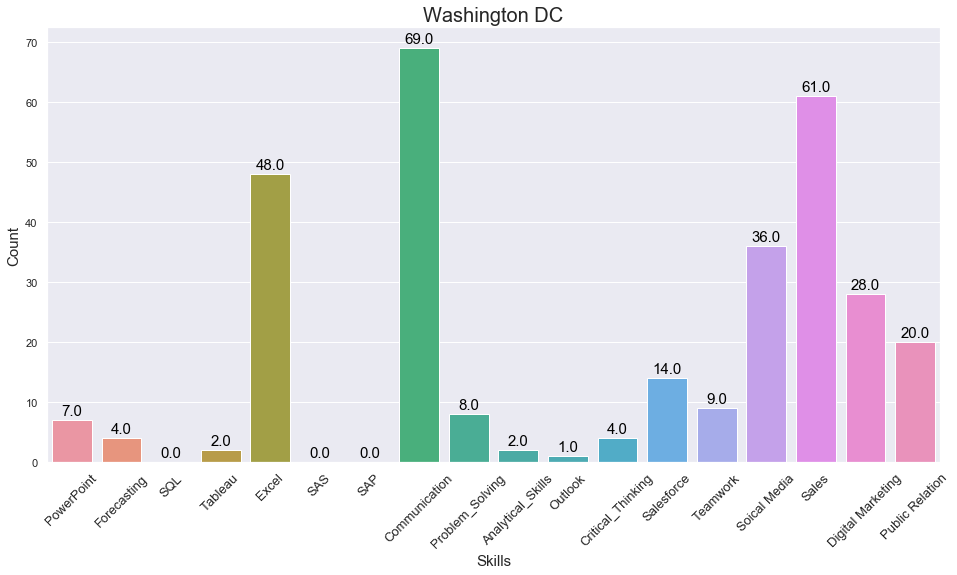

https://www.indeed.com/m/jobs?q=marketing+director&l=New+York
Total Jobs: 229
Number of Jobs: 229
               skills  Count
0          PowerPoint   24.0
1         Forecasting   20.0
2                 SQL    2.0
3             Tableau    5.0
4               Excel  144.0
5                 SAS    1.0
6                 SAP    2.0
7       Communication  169.0
8     Problem_Solving   12.0
9   Analytical_Skills   22.0
10            Outlook   11.0
11  Critical_Thinking    3.0
12         Salesforce    5.0
13           Teamwork   27.0
14       Soical Media   69.0
15              Sales  127.0
16  Digital Marketing   63.0
17    Public Relation   27.0


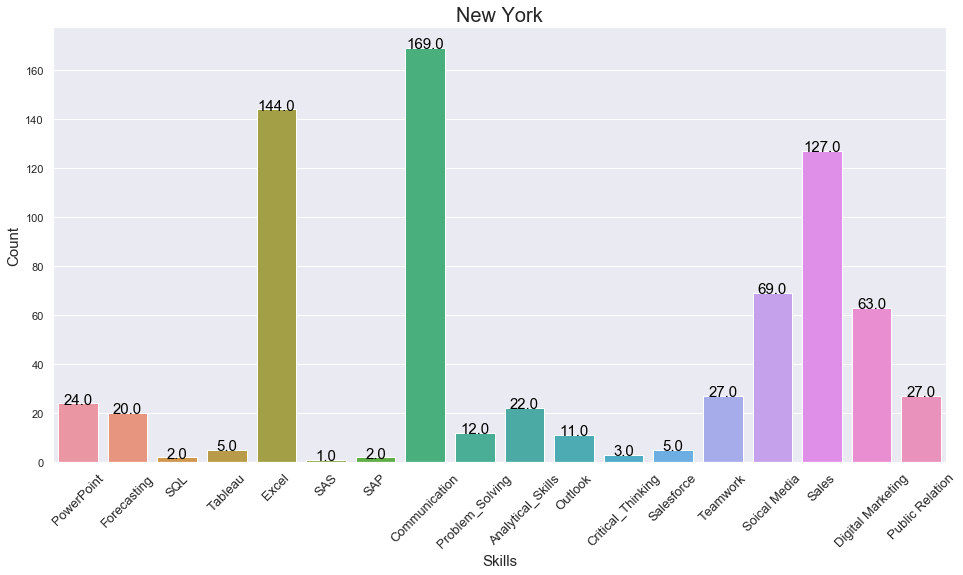

https://www.indeed.com/m/jobs?q=marketing+director&l=San+Francisco
Total Jobs: 240
Number of Jobs: 240
               skills  Count
0          PowerPoint   12.0
1         Forecasting    9.0
2                 SQL   20.0
3             Tableau    5.0
4               Excel  127.0
5                 SAS    2.0
6                 SAP    1.0
7       Communication  176.0
8     Problem_Solving   13.0
9   Analytical_Skills   27.0
10            Outlook   11.0
11  Critical_Thinking    7.0
12         Salesforce   35.0
13           Teamwork   12.0
14       Soical Media   58.0
15              Sales  157.0
16  Digital Marketing   48.0
17    Public Relation   22.0


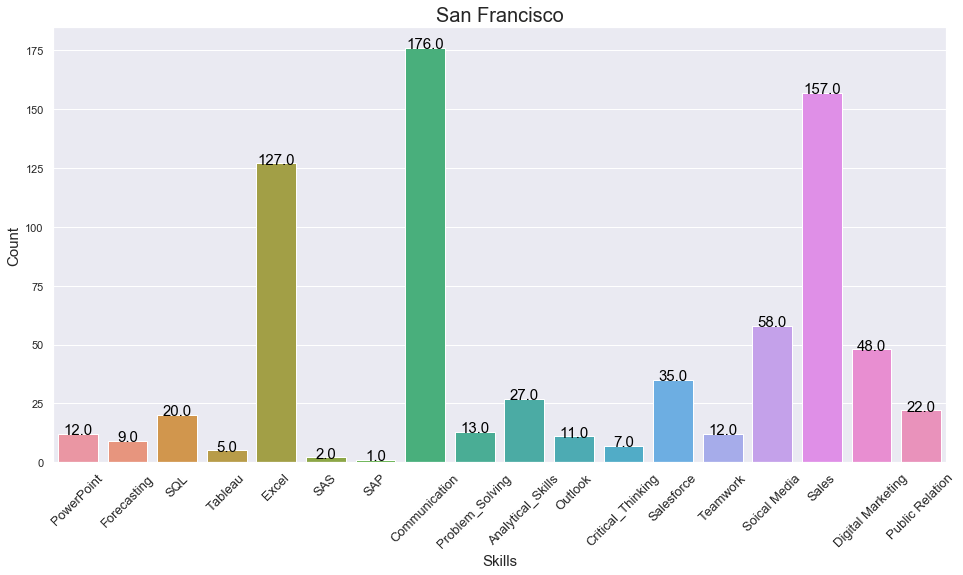

https://www.indeed.com/m/jobs?q=marketing+director&l=Chicago
Total Jobs: 254
Number of Jobs: 254
               skills  Count
0          PowerPoint   36.0
1         Forecasting   12.0
2                 SQL   15.0
3             Tableau   23.0
4               Excel  151.0
5                 SAS    0.0
6                 SAP    6.0
7       Communication  205.0
8     Problem_Solving   19.0
9   Analytical_Skills   22.0
10            Outlook   11.0
11  Critical_Thinking   15.0
12         Salesforce   29.0
13           Teamwork   13.0
14       Soical Media   62.0
15              Sales  173.0
16  Digital Marketing   69.0
17    Public Relation   37.0


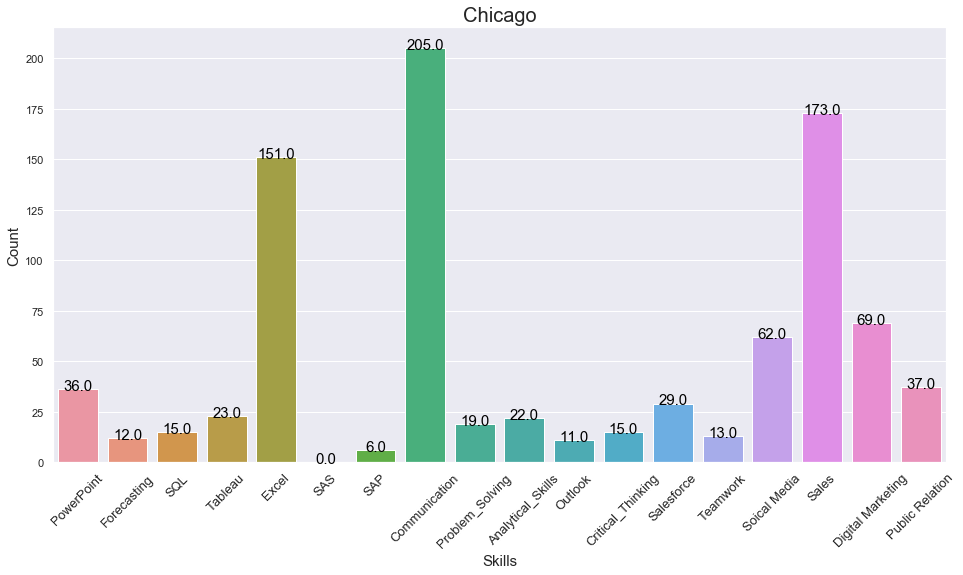

https://www.indeed.com/m/jobs?q=marketing+director&l=Philadelphia
Total Jobs: 100
Number of Jobs: 100
               skills  Count
0          PowerPoint   11.0
1         Forecasting    5.0
2                 SQL    4.0
3             Tableau    1.0
4               Excel   57.0
5                 SAS    1.0
6                 SAP    0.0
7       Communication   77.0
8     Problem_Solving    7.0
9   Analytical_Skills    8.0
10            Outlook    3.0
11  Critical_Thinking    4.0
12         Salesforce    4.0
13           Teamwork    6.0
14       Soical Media   33.0
15              Sales   60.0
16  Digital Marketing   27.0
17    Public Relation   12.0


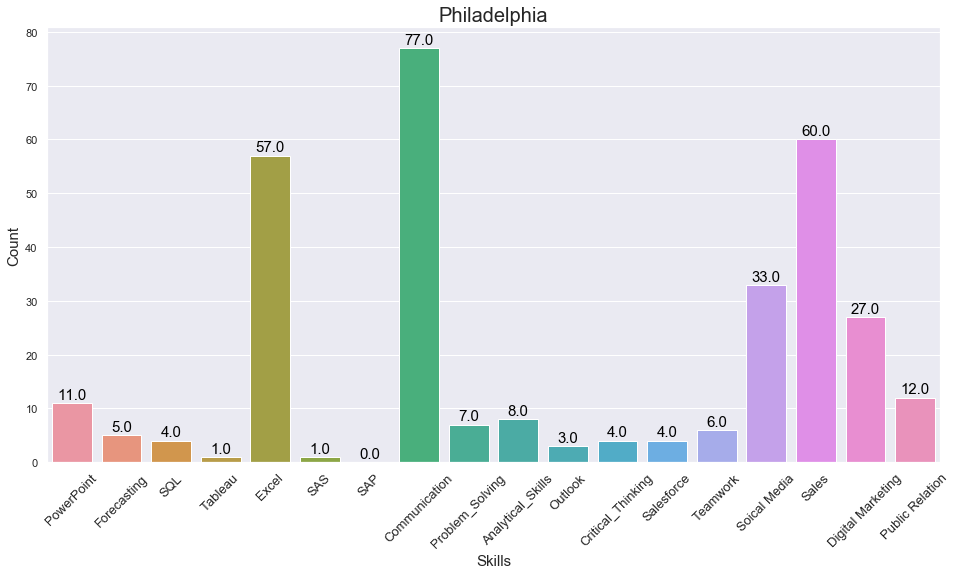

In [61]:
items = {'Washington%2C+DC':10,'New+York':20, 'San+Francisco':20, 'Chicago':20, 'Philadelphia':10}
url_test = 'https://www.indeed.com/m/jobs?q=marketing+director&l={}'
df_count_md = pd.DataFrame([])
for i in items.items():
    url = url_test.format(i[0])
    print(url)
    df_count, df_total = getlink2(url,i[1])
    if i[0] == 'Washington%2C+DC':
        plot_count2(df_count, df_total, 'Washington DC')
        df_count['City'] = 'Washington DC'
    elif i[0] == 'New+York':
        plot_count2(df_count, df_total, 'New York')
        df_count['City'] = 'New York'
    elif i[0] == 'San+Francisco':
        plot_count2(df_count, df_total, 'San Francisco')
        df_count['City'] = 'San Francisco'
    else:
        plot_count2(df_count, df_total,i[0] )
        df_count['City'] = i[0]
    df_count['Title'] = 'Manager'
    df_count_md = df_count_md.append(df_count)

### Dataset for tableau

In [76]:
df30 = pd.concat([df_count_all, df_count_md], axis = 0)
df_final = df30.groupby(['City', 'skills']).agg({'Count':'sum'})
df_final

Count
City          skills                  
Chicago       Analytical_Skills   46.0
              Communication      483.0
              Critical_Thinking   28.0
              Digital Marketing  148.0
              Excel              354.0
...                                ...
Washington DC Sales              188.0
              Salesforce          38.0
              Soical Media       158.0
              Tableau              8.0
              Teamwork            27.0

[108 rows x 1 columns]

In [77]:
#df_final.to_csv('Marketing_data.csv')